(chap9)=

# 9. End to End Bayesian Workflows

Some restaurants offer a style of dining called menu *dégustation*, or
in English a tasting menu. In this dining style, the guest is provided a
curated series of dishes, typically starting with *amuse bouche*, then
progressing through courses that could vary from soups, salads,
proteins, and finally dessert. To create this experience a recipe book
alone will do nothing. A chef is responsible for using good judgement to
determine selecting specific recipes, preparing each one, and
structuring the courses as a whole to create an impactful experience for
the guest all with impeccable quality and presentation.

This same idea holds true for Bayesian analysis. A book of math and code
alone will do nothing. A statistician haphazardly applying techniques
will not get far either. Successful statisticians must be able to
identify the desired outcome, determine the techniques needed, and work
through a series of steps to achieve that outcome.

(BayesWorkflowSection)=

## 9.1. Workflows, Contexts, and Questions

Generically all cooking recipes follow a similar structure: ingredients
are selected, processed through one or more methods, and then finally
assembled. How it is done specifically depends on the diner. If they
want a sandwich the ingredients include tomatoes and bread, and a knife
for processing. If they want tomato soup, tomatoes are still needed but
now a stove is also needed for processing. Considering the surroundings
is relevant as well. If the meal is being prepared at a picnic and there
is no stove, making soup, from scratch, is not possible.

At a high level performing Bayesian analysis shares some similarities
with a cooking recipe, but the resemblance is only superficial. The
Bayesian data analysis process is generally very iterative, with the
steps performed in a non-linear fashion. Moreover, the exact necessary
steps needed to obtain good results are more difficult to anticipate.
This process is called Bayesian workflow {cite:p}`Gelman2020` and a simplified
version of it is shown in {numref}`fig:BayesianWorkflow`. The Bayesian
workflow includes the three steps of model building: inference, model
checking/improvement, and model comparison. In this context the purpose
of model comparison is not necessarily restricted to pick the *best*
model, but more importantly to better understand the models. A Bayesian
workflow, and not just Bayesian inference, is important for several
reasons. Bayesian computation can be challenging and generally requires
exploration and iteration over alternative models in order to achieve
inference that we can trust. Even more, for complex problems we
typically do not know ahead of time what models we want to fit and even
if so, we would still want to understand the fitted model and its
relation to the data. Some common elements to all Bayesian analyses,
that are reflected in {numref}`fig:BayesianWorkflow`, are the need of
data and some prior (or domain) knowledge, some technique used to
process the data, and an audience typically wanting a report of some
kind with the conclusion of what we learn.

```{figure} figures/Bayesian_workflow.png
:name: fig:BayesianWorkflow
:width: 8.00in
A high level generic Bayesian workflow showing the main steps involved.
The workflow has many junctures requiring decisions, and some steps may
be omitted entirely. It is the responsibility of the practitioner to
make this determination in each situation. For example, "pick a model\"
could mean choosing a single model, averaging some or all of them, or
even presenting all the models and discussing their strengths and
shortcomings. Also notice that all the "evaluate\" steps can be used for
model comparison. We can compare models based on their posterior
predictive distributions or pick a model with good convergence
diagnostics or the one with the prior predictive distribution closer to
our domain knowledge. Finally, we must notice that sometimes we,
unfortunately, will need to give up. Even if we are not entirely happy
with some model it may be the best model we can achieve given the
available resources. A more detailed version of the Bayesian workflow
can be seen in a paper aptly titled Bayesian Workflow by Gelman et al
{cite:p}`Gelman2020` and the article Towards a Principled Bayesian Workflow by
Betancourt {cite:p}`betancourt_2020_worfklow`.
```

The most influential factor in the specific techniques used is what we
will refer to as the *driving question*. This is the question that is of
value to our colleagues and stakeholders, that we are trying to answer
with our analysis, and is worth the time and effort to try to find an
answer. It is important to differentiate this question from any others.
During our analysis we will run into many other questions, such as data
questions, modeling questions, inference questions, which answer "How
should we conduct our analysis\"; but should not be confused with the
driving question, which is "why we are conducting our analysis\".

So before starting any statistical analysis, the first and foremost task
is to clearly define the questions you are trying to answer. The simple
reason is that the driving question affects every downstream choice in a
Bayesian workflow. This will help us determine, what data you should
collect, what tools are needed, if a model is appropriate, what model is
appropriate, how to formulate models, how to choose priors, what to
expect from the posterior, how to pick between models, what the results
are indicating, how to summarize results, what conclusion to
communicate. The answers to each of these affect whether the analysis
will be useful to your audience or will just collect digital dust in a
hard drive. And equally as important how much time and effort is
worthwhile in pursuit of the answer.

All too often data practitioners, given an idea of a question, decide it
needs an answer and instantly reach for the most complex and nuanced
statistical tools, spending little to no time understanding the need.
Consider the equivalent situation if we were a chef. They hear someone
is hungry so they prepare a \$10,000 dish of caviar only to learn a
simple bowl of cereal would have sufficed. Yet there have been actual
instances where Data Scientists generate \$10,000 cloud computing bills
on big GPU machines using neural networks when a linear regression may
have been sufficient. Do not be the Data Scientist and statistician that
immediately reaches for Bayesian Methods, Neural Networks, Distributed
Computing Clusters, or other complex tools before truly understanding
the need.

(applied-example-airlines-flight-delays-problem)=

### 9.1.1. Applied Example: Airlines Flight Delays Problem

For most sections in this chapter each example will build upon the
previous section, which we will start with here. Let us imagine we work
at the Madison Wisconsin airport, in the United States, as a
statistician. Delays in flight arrivals are leading to frustrations and
our mathematical skills can help quantify the situation. We first
recognize there are multiple individuals involved, a traveler who has to
decide when to arrive at an airport, an accountant working for the
airport, or the CEO of the airport who has to manage the whole
operation.

Each of these folks has different concerns, which leads to different
questions, some of which could be:

1.  What is the chance my flight departure is going to get delayed?

2.  What is the chance my flight arrival is going to get delayed?

3.  How many flight arrivals were delayed last week?

4.  How much do flight delays cost the airport?

5.  Given two business choices which one should I make?

6.  What correlates with flight departure delays?

7.  What is causing flight departure delays?

Each of these questions, while all related, are subtly different. The
traveler is concerned with the delay of their particular flight, but the
airport accountant and executives care about the delays across all
flights. The accountant is not worried about the time duration of flight
delays, but is interested in the cost of those delays for financial
records. The executive is less concerned about history, and more
concerned about what strategic decision to make given future flight
delays.

At this point you as the reader might be asking, I came here to learn
Bayesian Modeling, when are we getting to that? Before we get there
consider this case. If the driving question is *"How many plane arrivals
were late last week?\"* do we need a Bayesian model? The unsatisfying
answer is no, inference is not needed, just basic counting. Do not
assume that Bayesian statistics is needed for every problem. Strongly
consider whether summary statistics such as simple counts, means, and
plots, will be enough to answer the driving question.

Now, suppose the airport CEO comes to you, the airport statistician,
with a dilemma. For each arrival the airport must keep staff on standby
to guide the airplane landing and a gate available to unload passengers.
This means when airplanes arrive late, staff and airport infrastructure
are left idle waiting for the arrival and ultimately money wasted on
unused resources. Because of this the airport and airlines have an
agreement that for each minute late the airline will pay the airport 300
dollars a minute. The airlines however have now asked this agreement be
changed. They propose all delays under 10 minutes to cost a flat rate of
1000 dollars, a delay between 10 minutes and 100 minutes to cost 5000
dollars, and a delay over 100 minutes to cost 30,000 dollars. Your CEO
suspects the airlines are proposing this structure to save themselves
money. The airport CEO asks you to use your data abilities to answer the
question, "Should we accept the new late fee structure or keep the old
one?\". The airline CEO mentions how expensive this decision could be if
it was made incorrectly and asks you to prepare a report regarding the
potential financial effects. As experienced statistician you decide to
quantify the underlying distribution of delays and use decision analysis
to aid with the infrastructure investment choice. We believe an
integrated End to End Bayesian analysis will provide a more complete
understanding of future outcomes. You are able to justify the cost and
complexity of model development as the financial risk of making a poor
decision far outweighs the time and cost to make a Bayesian model. If
you are not sure how we reached this conclusion do not worry, we will
walk through the thought process step by step in subsequent sections. We
come back to this flight delay problem in the sub-sections with titles
starting with *Applied Example*.

(getting-data)=

## 9.2. Getting Data

Cooking a good dish is impossible for a chef without ingredients and
challenging with poor quality ingredients. Likewise, inference is
impossible without data and challenging with poor quality data. The
best statisticians dedicate a fair amount of time understanding the
nuance and detail of their information. Unfortunately there is no 
one-size-fits-all strategy for what data is available or how to collect it
for every driving question. Considerations span topics from the
precision required, to cost, to ethics, to speed of collection. There are
however, some broad categories of data collection that we can consider,
each with its pros and cons.

(sample-surveys)=

### 9.2.1. Sample Surveys

In American history there is this folk idea of \"asking for your
neighbors for a cup of sugar\", convenient for the times when you run
out. For statistician the equivalent is sample surveys, also known as
polling. The typical motivation of polling is to estimate a population
parameter, $Y$, using a finite number of observations. Sample surveys
also can include covariates, for example age, gender, nationality, to
find correlations. Various methodologies for sampling exist, such as
random sampling, stratified sampling, and cluster sampling. Different
methods make tradeoffs between cost, ignorability and other factors.

(experimental-design)=

### 9.2.2. Experimental Design

A very popular dining concept these days is farm to table. For a chef
this can be appealing as they are free from the constraints of what is
typically available, and can instead acquire a much broader range of
ingredients while maintaining control over every aspect. For
statisticians the equivalent process is called experimental design. In
experiments statisticians are able to decide what they want to study,
then design the data generating process that will help them best
understand their topic of interest. Typically this involves a
"treatment\" where the experimenter can change part of the process, or
in other words vary a covariate, to see the effect on
$\boldsymbol{y}_{obs}$. The typical example is pharmaceutical drug
trials, where the effectiveness of new drugs is tested withholding the
drug from one group and giving the drug to another group. Examples of
treatment patterns in experimental design include randomization,
blocking, and factorial design. Examples of data collection
methodologies include topics such as double blind studies, where neither
the subject nor the data collector know which treatment was applied.
Experimental design is typically the best choice to identify causality,
but running experiments typically comes at a high cost.

(observational-studies)=

### 9.2.3. Observational Studies

Farming your own ingredients can be expensive, so a cheaper alternative
could be foraging for ingredients that are growing by themselves. The
statistician's version of this is observational studies. In
observational studies the statistician has little to no control over the
treatments or the data collection. This makes inference challenging as
the available data may not be adequate to achieve the goals of the
analysis effort. The benefit however is that, especially in modern
times, observational studies are occurring all the time. For example
when studying the use of public transportation during inclement weather,
it is not feasible to randomize rain or no rain, but the effect can be
estimated by recording the weather for the day with other measurements
like ticket sales of the day. Like experimental design, observational
studies can be used to determine causality, but much more care must be
taken to ensure data collection is ignorable (you will see a definition
shortly below) and that the model does not exclude any hidden effects.

(missing-data)=

### 9.2.4. Missing Data

All data collection is susceptible to missing data. Folks may fail to
respond to a poll, an experimenter could forget to write things down, or
in observational studies a day's logs could be deleted accidentally.
Missing data is not always a binary condition either, it could also mean
part of the data is missing. For example, failing to record digits after
a decimal points leading e.g. missing precision.

To account for this we can extend our formulation of Bayes' theorem to
account for missingness by adding a terms as shown in Equation
{eq}`eq:missing_data` {cite:p}`GelmanBayesianDataAnalysis2013`. In this
formulation $\boldsymbol{I}$ is the inclusion vector that denotes which
data points are missing or included, and $\boldsymbol{\phi}$ represents
the parameters of the distribution inclusion vector.

```{math} 
:label: eq:missing_data
\begin{split}
    Y_{obs} &= {(i,j):  \boldsymbol{I}_{ij}=1} \\
     Y_{mis} &= {(i,j): \boldsymbol{I}_{ij}=0}  \\
         p(\boldsymbol{\theta}, \boldsymbol{\phi} \mid  Y_{obs},I) &\propto  p(Y_{obs}, I \mid \boldsymbol{\theta}, \boldsymbol{\phi})p(\boldsymbol{\theta}, \boldsymbol{\phi})
    \end{split}
    
```

Even if missing data is not explicitly modeled it is prudent to remain
aware that your observed data is biased just due to the fact that it has
been observed! When collecting data be sure to not only pay attention to
what is present, but consider also what may not be present.

(applied-example-collecting-airline-flight-delays-data)=

### 9.2.5. Applied Example: Collecting Airline Flight Delays Data

Working at the airport you have access to many datasets, from current
temperature, to revenue from the restaurants and shops, to airport
hours, number of gates, to data regarding the flight.

Recalling our driving question, "Based on the late arrivals of
airplanes, which late fee structure would we prefer?\". We need a
dataset the quantifies that notion of lateness. If the late fee
structures had been binary, for example, 100 dollars for each late
arrival, then a boolean True/False would have sufficed. In this case
both the current late fee structure and previous late fee structure
require minute level data on arrival delays.

You realize that as a small airport, Madison has never had a flight
arrival from far off destinations such as London Gatwick Airport, or
Singapore Changi Airport, a big gap in your observed dataset. You ask
your CEO about this and she mentions this agreement will only apply to
flights coming from Minneapolis and Detroit airports. With all this
information you feel comfortable that you understand the data you will
need to model the relevant flight delays.

From knowledge of the \"data generating process\" you know that weather
and airline companies have an effect on flight delays. However you
decide not to include these in your analysis for three reasons. Your
boss is not asking why flights are delayed, obviating the need for an
analysis of covariates. You independently assume that historical weather
and airline company behavior will remain consistent, meaning you will
not need to perform any counterfactual adjustments for expected future
scenarios. And lastly you know your boss is under a short deadline so
you specifically designed a simple model that can be completed
relatively quickly.

With all that your data needs have narrowed down to minute level dataset
of flight arrival delays. In this situation using the prior history of
observational data is the clear choice above experimental designs or
surveys. The United States Bureau of Transportation Statistics keeps
detailed logs of flight data which includes delays information. The
information is kept to the minute precision which is adequate for our
analysis, and given how regulated airline travel is we expect the data
to be reliable. With our data in hand we can move to our first dedicated
Bayesian task.

(making-a-model-and-probably-more-than-one)=

## 9.3. Making a Model and Probably More Than One

With our question and data firmly in hand we are ready to start
constructing our model. Remember model building is iterative and your
first model will likely be wrong in some way. While this may seem
concerning, it actually can be freeing, as we can start from good
fundamentals and then use the feedback we get from our computational
tools to iterate to a model that answers our driving question.

(questions-to-ask-before-building-a-bayesian-model)=

### 9.3.1. Questions to Ask Before Building a Bayesian Model

In the construction of a Bayesian model a natural place to start is the
Bayes Formula. We could use the original formulation but instead we
suggest using Formula {eq}`eq:missing_data` and thinking through each
parameter individually

-   $p(Y)$: (Likelihood) What distribution describes the observed data
    given X?

-   $p(X)$: (Covariates) What is the structure of the latent data
    generating process?

-   $p(\boldsymbol{I})$: (Ignorability) Do we need to model the data
    collection process?

-   $p(\boldsymbol{\theta})$: (Priors) Before seeing any data what is a
    reasonable set of parameters?

Additionally since we are computational Bayesians we must also answer
another set of questions

-   Can I express my model in a Probabilistic Programming framework?

-   Can we estimate the posterior distributions in a reasonable amount
    of time?

-   Does the posterior computation show any deficiencies?

All of these questions do not need to be answered immediately and nearly
everyone gets them wrong when initially building a new model. While the
ultimate goal of the final model is to answer the driving question, this
is not typically the goal of the first model. The goal of the first
model is to express the simplest reasonable and computable model. We
then use this simple model to inform our understanding, tweak the model,
and rerun as shown in {numref}`fig:BayesianWorkflow`. We do this using
the numerous tools, diagnostics, and visualizations that we have seen
throughout this book.

::: {admonition} Types of Statistical Models

If we refer to D. R. Cox {cite:p}`cox_2006` there
are two general ways to think about building statistical models, a model
based approach where "The parameters of interest are intended to capture
important and interpretable features of that generating process,
separated from the accidental features of the particular data. Or a
design based approach where "sampling existing populations and of
experimental design there is a different approach in which the
probability calculations are based on the randomization used by the
investigator in the planning phases of the investigation\". The
fundamentals of Bayes formula have no opinion on which approach is used
and Bayesian methods can be used in both approaches. Our airline example
is a model based approach, whereas the experimental model at the end of
the chapter is a design based approach. For example, it can be argued
that most frequentist based analyses follow the design based approach.
This does not make them right or wrong, just different approaches for
different situations.
:::

(applied-example-picking-flight-delay-likelihoods)=

### 9.3.2. Applied Example: Picking Flight Delay Likelihoods

For our flight delay dilemma we decide to start the modeling journey by
picking a likelihood for the observed flight delays. We take a moment to
collect in detail our existing domain knowledge. In our dataset, delays
can be negative or positive valued. Positive valued means flight is
late, negative valued means flight is early. We could make choice here
to only model delays and ignore all early arrivals. However, we will
choose to model all arrivals so we can build a generative model for all
flight arrivals. This may come in handy for the decision analysis we
will be doing later.

Our driving question does not pose any questions about correlation or
causation, so we will model the observed distribution without any
covariates for simplicity. This way we can just focus on likelihood and
priors. Adding covariates may help modeling the observed distribution
even if they are of no individual interest themselves, but we do not
want to get ahead of ourselves. Let us plot the observed data to get a
sense of its distribution using Code Block
[plot_flight_data](plot_flight_data), the result is shown
in {numref}`fig:ArrivalDistributions`.


```{code-block} python
:name: plot_flight_data
:caption: plot_flight_data


df = pd.read_csv("../data/948363589_T_ONTIME_MARKETING.zip")
fig, ax = plt.subplots(figsize=(10,4))

msn_arrivals = df[(df["DEST"] == "MSN") & df["ORIGIN"].isin(["MSP", "DTW"])]["ARR_DELAY"]

az.plot_kde(msn_arrivals.values, ax=ax)
ax.set_yticks([])
ax.set_xlabel("Minutes late")
```

```{figure} figures/ArrivalDistributions.png
:name: fig:ArrivalDistributions
:width: 8.00in
Kernel density estimate plot for the observed arrival delay data. Note a
couple of interesting features. The bulk of all flight arrivals is
between -20 and 40 and in this region there is a general bell shaped
pattern. However, there is a long tail of large values indicating that
while relatively few flights are late, some of them can be really late
in arriving to the Madison airport.
```

In [1]:
import pandas as pd
import arviz as az

import matplotlib.pyplot as plt
import pymc as pm
import numpy as np


np.random.seed(seed=233423)
sampling_random_seed = 0

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300 

In [3]:
df = pd.read_csv("../data/948363589_T_ONTIME_MARKETING.csv", low_memory=False)

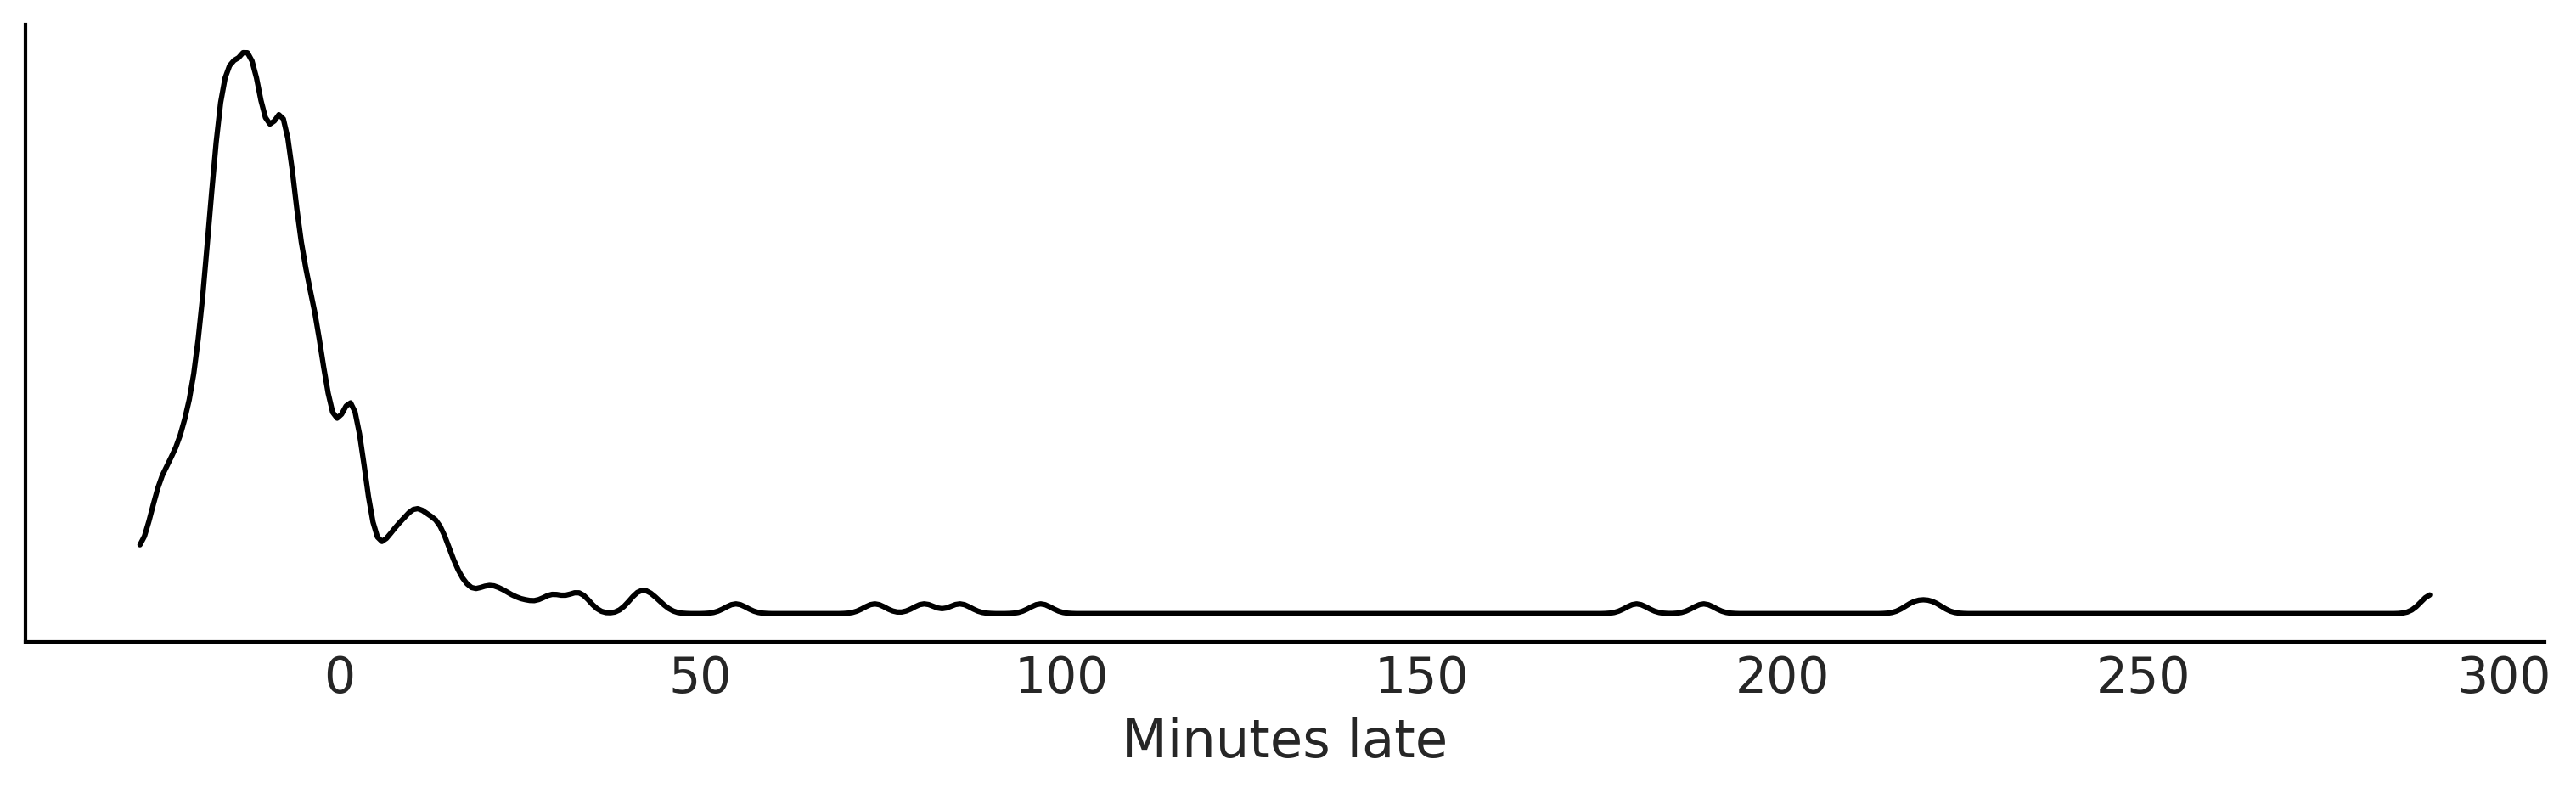

In [4]:
fig, ax = plt.subplots(figsize=(10, 3))
msn_arrivals = df[(df["DEST"] == 'MSN') & df["ORIGIN"]
                  .isin(["MSP", "DTW"])]["ARR_DELAY"]

az.plot_kde(msn_arrivals.values, ax=ax)
ax.set_yticks([])
ax.set_xlabel("Minutes late")
plt.savefig('img/chp09/arrivaldistributions.png')

In [5]:
msn_arrivals.notnull().value_counts()

ARR_DELAY
True    336
Name: count, dtype: int64

Thinking through likelihood we have a couple of choices. We could model
this as a discrete categorical distribution, where every possible minute
is assigned a probability. But this might pose some challenges: from a
statistical perspective we need to pick the number of buckets. While
there are non-parametric techniques that allow the number of buckets to
vary, this now means we also have to create a model that can estimate
bucket number, on top of estimating each probability for each bucket.

From domain expertise we know each minute is not quite independent of
each other. If many planes are 5 minutes late, it makes intuitive sense
that many planes will also be 4 minutes late or 6 minutes late. Because
of this a continuous distribution seems more natural. We would like to
model both early and late arrivals so distribution must have support
over negative and positive numbers. Combining statistical and domain
knowledge we know that most planes are on time, and that flights usually
arrive a little early or a little late, but if they are late they can be
really late.

Exhausting our domain expertise we can now plot the data, checking for
both consistency with our domain expertise and for further clues to help
form our model. From {numref}`fig:ArrivalDistributions`, we have a few
reasonable choices of likelihood distributions: Normal, Skew-Normal, and
Gumbel distribution. A plain Normal is symmetrical which is inconsistent
with the skewness of the distribution, but it is an intuitive
distribution that could be used for baseline comparison. The Skew-Normal
as the name suggests has an additional parameter $\alpha$ controlling
the skewness of the distribution. And lastly the Gumbel distribution is
specifically designed to describe the maximum value of a set of values.
If we imagine that an airplane delay is caused from the maximum value of
luggage loading, passenger loading, and other latent factors the idea of
this distribution fits with the reality of flight arrival processes.

As airline processes are tightly regulated we do not feel that we need
to model missing data at this time. Additionally we choose to ignore
covariates to simplify our Bayesian workflow. It is generally advised to
start with a simple model, and let the full Bayesian workflow inform
your decisions to add complexity as needed, versus starting with a
complex model that becomes more challenging to debug in later steps.
Typically we would pick one likelihood and work all the way through the
Bayesian workflow before trying another. But to avoid backtracking this
example we will continue through two in parallel. For now we will move
forward with the Normal and Gumbel likelihood in Code Block
[plane_likelihoods](plane_likelihoods), leaving the
Skew-Normal likelihood model as an exercise for the reader.

```{code-block} python
:name: plane_likelihoods
:caption: plane_likelihoods

with pm.Model() as normal_model:
    normal_alpha = ...
    normal_sd = ...
    
    normal_delay = pm.Normal("delays", mu=mu, sigma=sd,  
                             observed=delays_obs)

with pm.Model() as gumbel_model:
    gumbel_beta = ...
    gumbel_mu = ...
    
    gumbel_delays = pm.Gumbel("delays", mu=mu, beta=beta, 
                              observed=delays_obs)
```

For now all the priors have the placeholder Ellipsis operator (\...).
Picking priors will be the topic of the next section.

In [6]:
try:
    # This is the real code, just try except block to allow for the whole notebook tor execute
    with pm.Model() as normal_model:
        normal_mu = ...
        normal_sd = ...

        normal_delay = pm.SkewNormal("delays", mu=normal_mu,
                                     sigma=normal_sd, observed=msn_arrivals)

    with pm.Model() as skew_normal_model:
        skew_normal_alpha = ...
        skew_normal_mu = ...
        skew_normal_sd = ...

        skew_normal_delays = pm.SkewNormal("delays", mu=skew_normal_mu, sigma=skew_normal_sd,
                                           alpha=skew_normal_alpha, observed=msn_arrivals)


    with pm.Model() as gumbel_model:
        gumbel_beta = ...
        gumbel_mu = ...

        gumbel_delays = pm.Gumbel("delays", mu=gumbel_mu,
                                  beta=gumbel_beta, observed=msn_arrivals)
except:
    pass

(choosing-priors-and-predictive-priors)=

## 9.4. Choosing Priors and Predictive Priors

Now that we have settled on likelihoods we need to pick priors. Similar
to before there are some general questions that help guide the choice of
prior.

1.  Does the prior make sense in the context of math?

2.  Does the prior make sense in the context of the domain?

3.  Can our inference engine produce a posterior with the chosen prior?

We have covered the priors extensively in previous sections. In Section 
{ref}`make_prior_count` we showed multiple principled
options for prior selected, such as Jeffrey's prior or weakly
informative priors. In Section {ref}`prior_predictive_checks` we showed how to
evaluate choices of priors computationally as well. As a quick
refresher, prior choice should be justified in context with likelihood,
model goal such as whether that is parameter estimation or prediction.
And we can also use prior distributions to codify our prior domain
knowledge about the data generating process. We may also use priors as a
tool to focus the inference process, to avoid spending time and
computation exploring parameter spaces that are "clearly wrong\", at
least as we would expect using our domain expertise.

In a workflow, sampling and plotting the prior and prior predictive
distribution gives us two key pieces of information. The first is that
we can express our model in our PPL of choice, and the second is an
understanding of the characteristics of our model choice, and the
sensitivity to our priors. If our model fails in prior predictive
sampling, or we realize we do not understand our model's response in the
absence of data we may need to repeat previous steps before moving
forward. Luckily with PPLs we can change the parameterization of our
priors, or the structure of our model, to understand its effects and
ultimately the informativeness of the chosen specification.

There should be no illusion that the prior distribution or likelihood
distributions are preordained. What is printed in this book is the
result of numerous trials and tweaking to find parameters that provided
a sensible prior predictive distribution. When writing your own models
expect that you should also iterate on the priors and likelihood before
moving onto the next step, inference.

(applied-example-picking-priors-for-flight-delays-model)=

### 9.4.1. Applied Example: Picking Priors for Flight Delays Model

Before making any specific numerical choices we take stock of our domain
knowledge about flight arrivals. Airline flight arrivals can be early or
late (negative or positive respectively) but exhibit some bounds. For
example, it seems unlikely that a flight would arrive more than 3 hours
late, but also unlikely it will be more than 3 hours early. Let us
specify a parameterization and plot the prior predictive to ensure
consistency with our domain knowledge, shown in Code Block
[airline_model_definition](airline_model_definition).

```{code-block} python
:name: airline_model_definition
:caption: airline_model_definition

with pm.Model() as normal_model:
    normal_sd = pm.HalfStudentT("sd",sigma=60, nu=5)
    normal_mu = pm.Normal("mu", 0, 30) 

    normal_delay = pm.Normal("delays",mu=normal_mu,
                             sigma=normal_sd, observed=msn_arrivals)
    normal_prior_predictive = pm.sample_prior_predictive()
    
with pm.Model() as gumbel_model:
    gumbel_beta = pm.HalfStudentT("beta", sigma=60, nu=5)
    gumbel_mu = pm.Normal("mu", 0, 40)
    
    gumbel_delays = pm.Gumbel("delays",
                              mu=gumbel_mu,
                              beta=gumbel_beta,
                              observed=msn_arrivals)
    gumbel_prior_predictive = pm.sample_prior_predictive()
```

```{figure} figures/Airline_Prior_Predictive.png
:name: fig:Airline_Prior_Predictive
:width: 8.00in
Prior predictive distributions for each of the models. Prior to
conditioning on data both distributions look reasonable for our domain
problem and similar to each other.
```

With no errors in our prior predictive simulation reported from the PPL
and with reasonable prior predictive distributions in
{numref}`fig:Airline_Prior_Predictive` we decide our choice of priors
are sufficient to continue to our next steps.

In [7]:
samples = 1000

with pm.Model() as normal_model:
    normal_sd = pm.HalfStudentT("sd", sigma=60, nu=5)
    normal_mu = pm.Normal("mu", 0, 30) 

    normal_delay = pm.Normal("delays", mu=normal_mu, sigma=normal_sd, observed=msn_arrivals)
    normal_prior_predictive = pm.sample_prior_predictive()
    
with pm.Model() as gumbel_model:
    gumbel_beta = pm.HalfStudentT("beta", sigma=60, nu=5)
    gumbel_mu = pm.Normal("mu", 0, 20)
    
    gumbel_delays = pm.Gumbel("delays", mu=gumbel_mu, beta=gumbel_beta, observed=msn_arrivals)
    gumbel_predictive = pm.sample_prior_predictive()


Sampling: [delays, mu, sd]
Sampling: [beta, delays, mu]


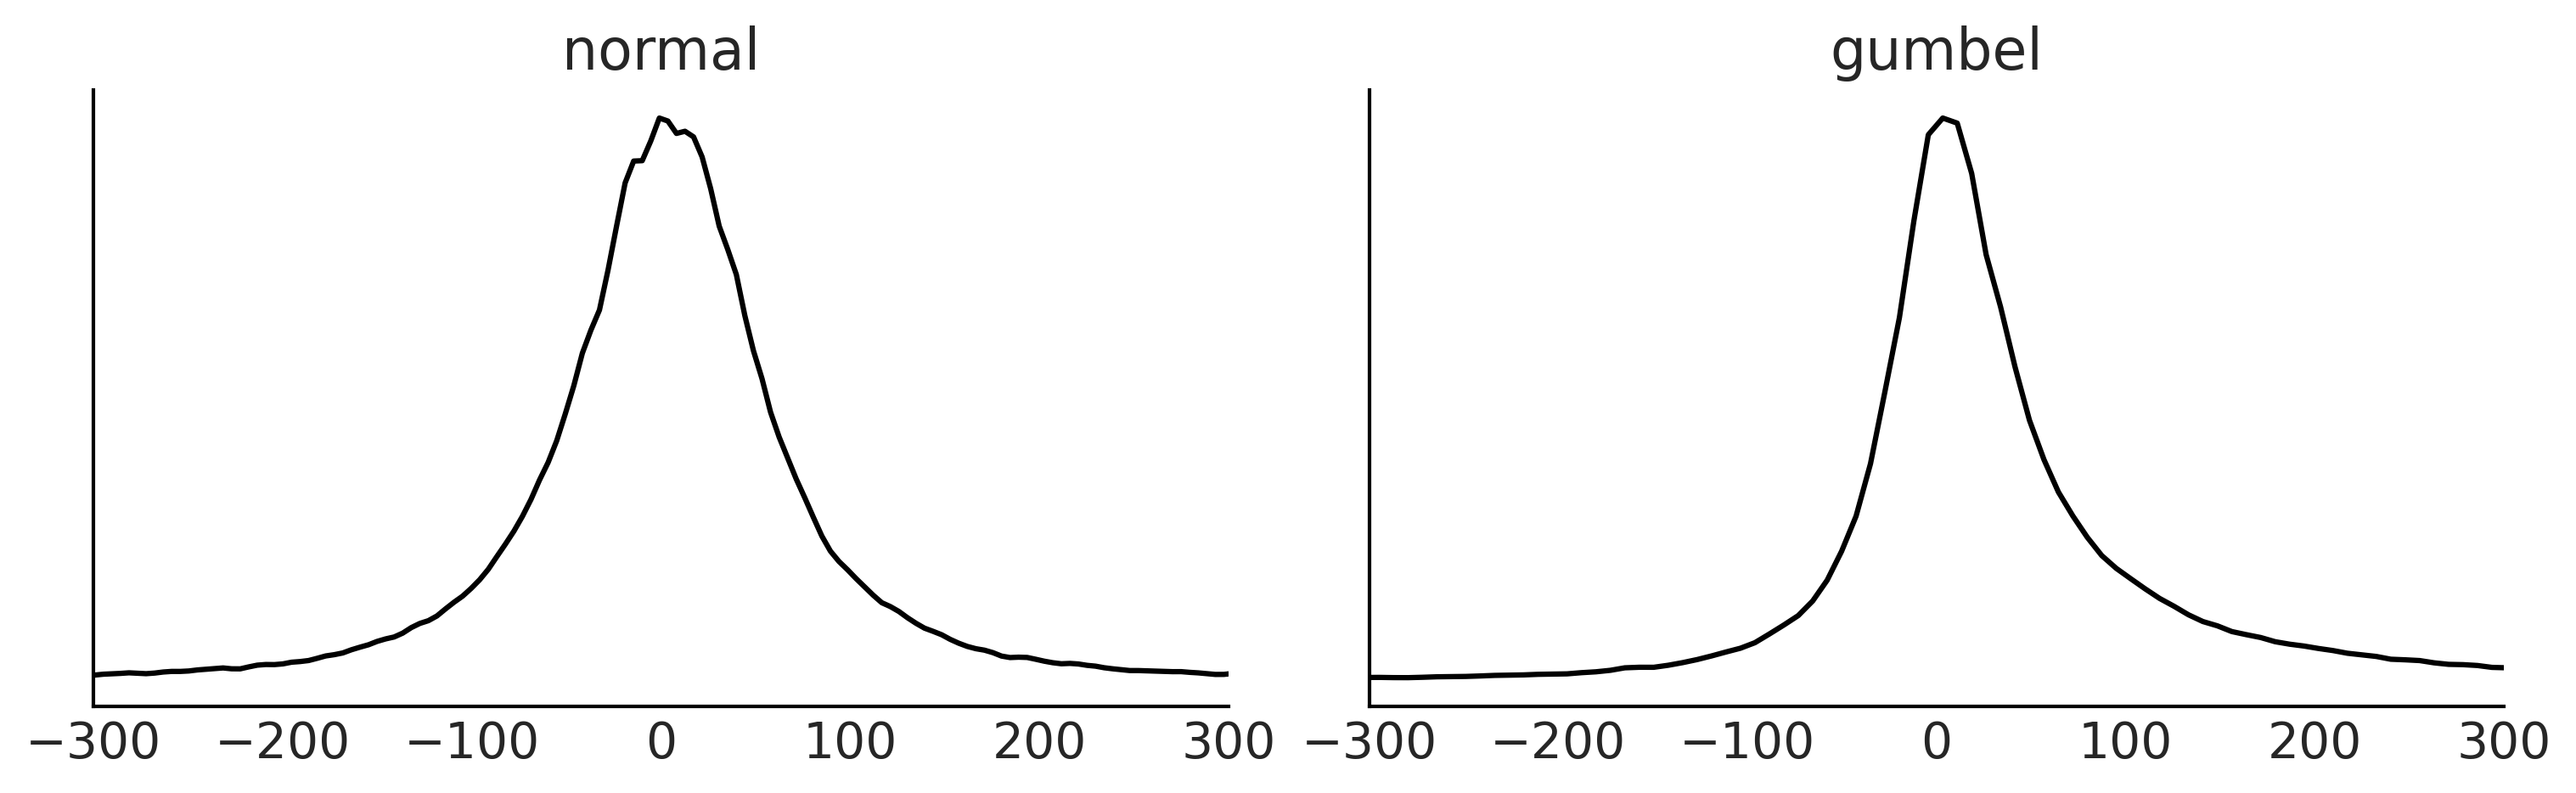

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

prior_predictives = {"normal":normal_prior_predictive, "gumbel": gumbel_predictive }

for i, (label, prior_predictive) in enumerate(prior_predictives.items()):
    
    data = prior_predictive.prior_predictive["delays"]
    az.plot_dist(data, ax=axes[i])
    axes[i].set_yticks([])
    axes[i].set_xlim(-300, 300)
    axes[i].set_title(label)
    
fig.savefig("img/chp09/Airline_Prior_Predictive.png")

(inference-and-inference-diagnostics)=

## 9.5. Inference and Inference Diagnostics

Dear reader, we hope that you have not skipped straight to this section.
Inference is the "most fun\" part where everything comes together and
the computer gives us "the answer\". But inference without a good
understanding of the question, data, and model (including priors) could
be useless, and misleading. In a Bayesian workflow inference builds upon
the previous steps. A common mistake is to attempt to fix divergences by
first tweaking sampler parameters, or running extra long chains, when
really it is the choice of priors or likelihood that is the root cause
of the issue. The folk theorem of statistical computing says: "when you
have computational problems, often there is a problem with your
model {cite:p}`Gelman_folk`.

That being said we have a strong prior that if you made it this far you
are a diligent reader and understand all our choices thus far so let us


(applied-example-running-inference-on-flight-delays-models)=

### 9.5.1. Applied Example: Running Inference on Flight Delays Models

We choose to use the default HMC sampler in PyMC3 to sample from the
posterior distribution.

Let us run our samplers and evaluate our MCMC chains using the typical
diagnostics. Our first indication of sampling challenges would be
divergences during MCMC sampling. With this data and model none were
raised. If some were raised however, this would indicate that further
exploration should be done such as the steps we performed in Section {ref}`model_geometry`.


```{code-block} python
:name: airline_model_inference
:caption: airline_model_inference

with normal_model:
    normal_delay_trace = pm.sample(random_seed=0, chains=2)
az.plot_rank(normal_delay_trace)

with gumbel_model:
    gumbel_delay_trace = pm.sample(chains=2)
az.plot_rank(gumbel_delay_trace)
```

```{figure} figures/rank_plot_bars_normal.png
:name: fig:Airline_Rank_Plot
:width: 8.00in
Rank plot of the posterior samples from the model with Normal
likelihood.
```

```{figure} figures/rank_plot_bars_gumbel.png
:name: fig:rank_plot_bars_gumbel
:width: 8.00in
Rank plot of the posterior samples from the model with Gumbel
likelihood.
```

For both models the rank plots, shown in Figures
{numref}`fig:Airline_Rank_Plot` and {numref}`fig:rank_plot_bars_gumbel`,
look fairly uniform across all ranks, which indicates little bias across
chains. Due to the lack of challenges in this example it seems that
inference is as easy as "pushing a button and getting results\".
However, it was easy because we had already spent time up front
understanding the data, thinking about good model architectures, and
setting good priors. In the exercises you will be asked to deliberately
make "bad\" choices and then run inference to see what occurs during
sampling.

Satisfied with the posterior samples generated from NUTS sampler we will
move onto our next step, generating posterior predictive samples of
estimated delays.

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


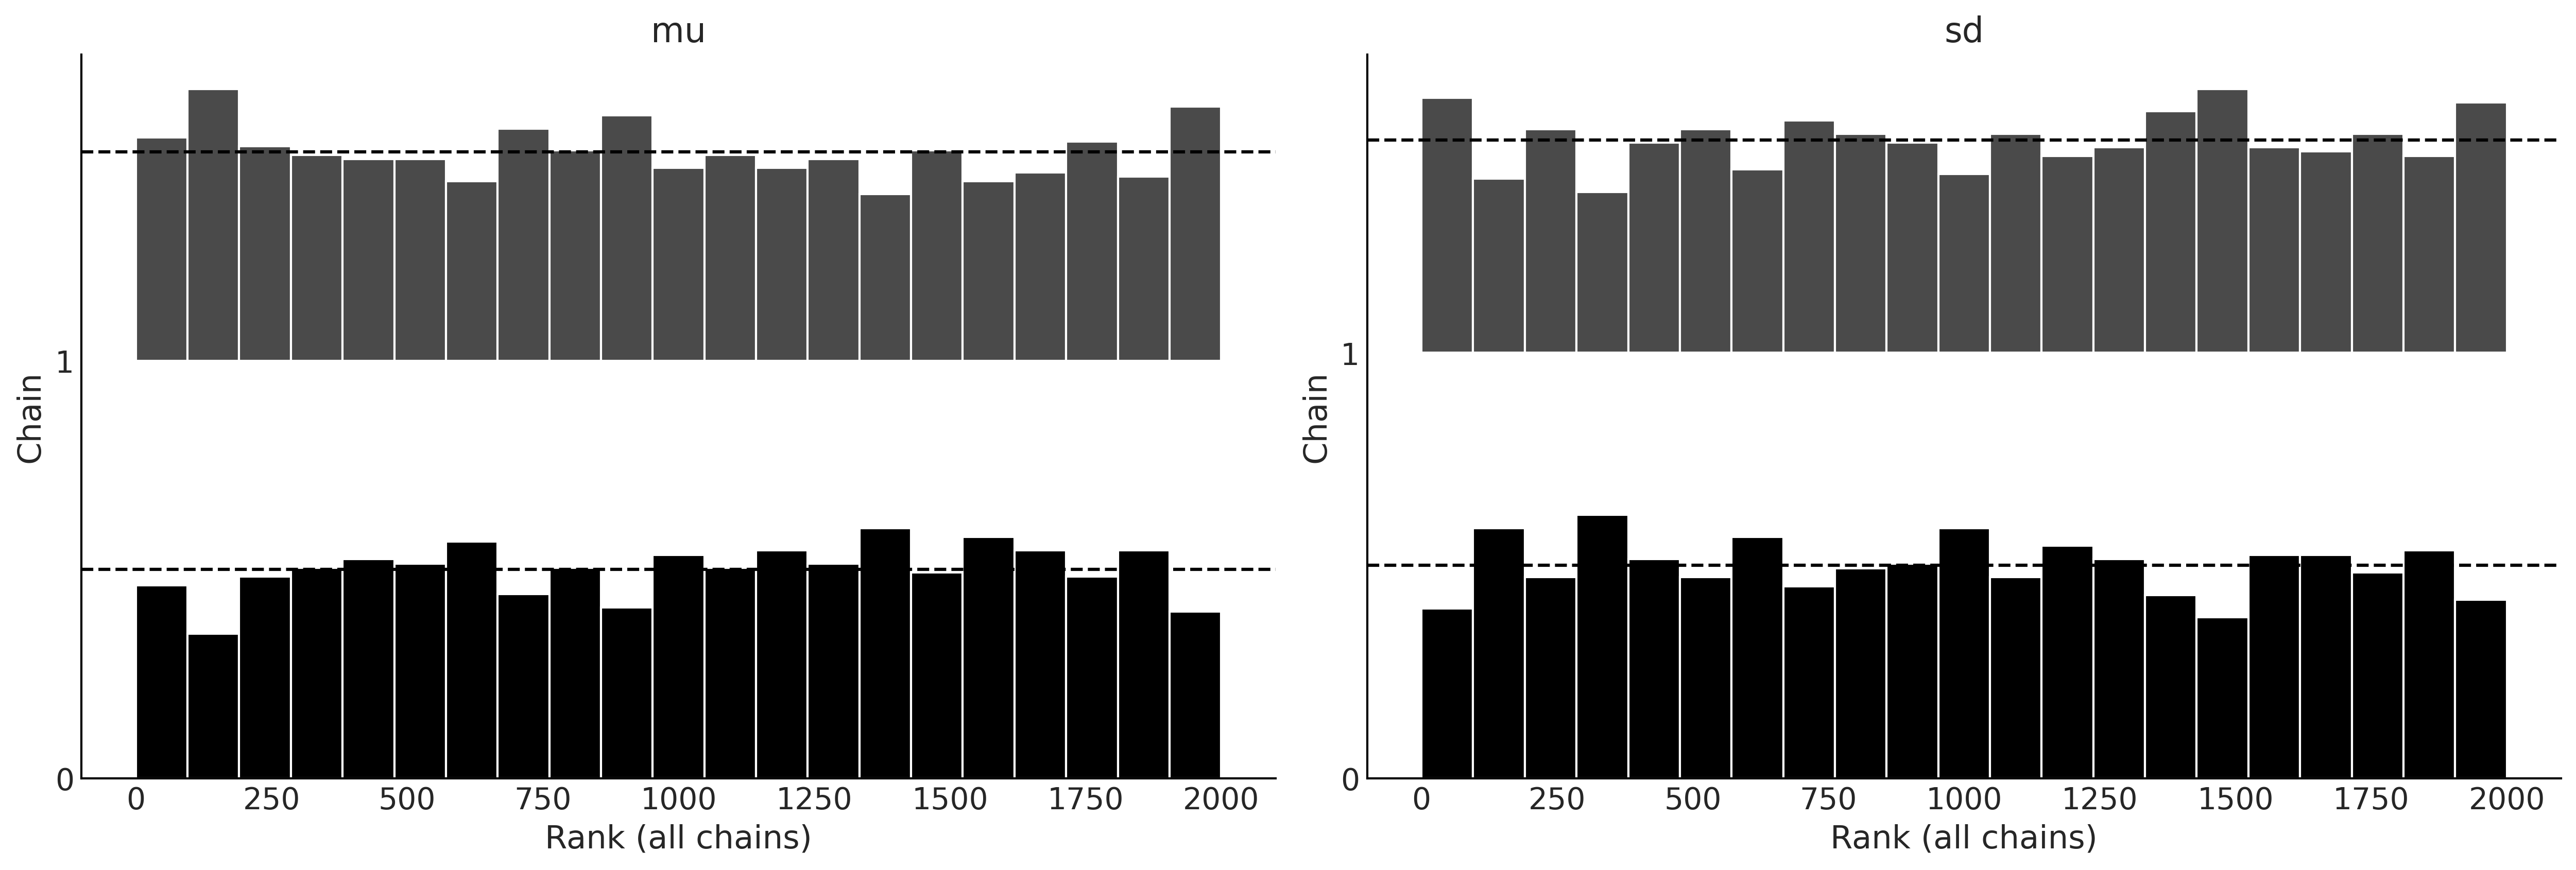

In [9]:
with normal_model:
    normal_data = pm.sample(random_seed=0, chains=2)
    az.plot_rank(normal_data)
plt.savefig('img/chp09/rank_plot_bars_normal.png')

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, mu]


Output()

Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


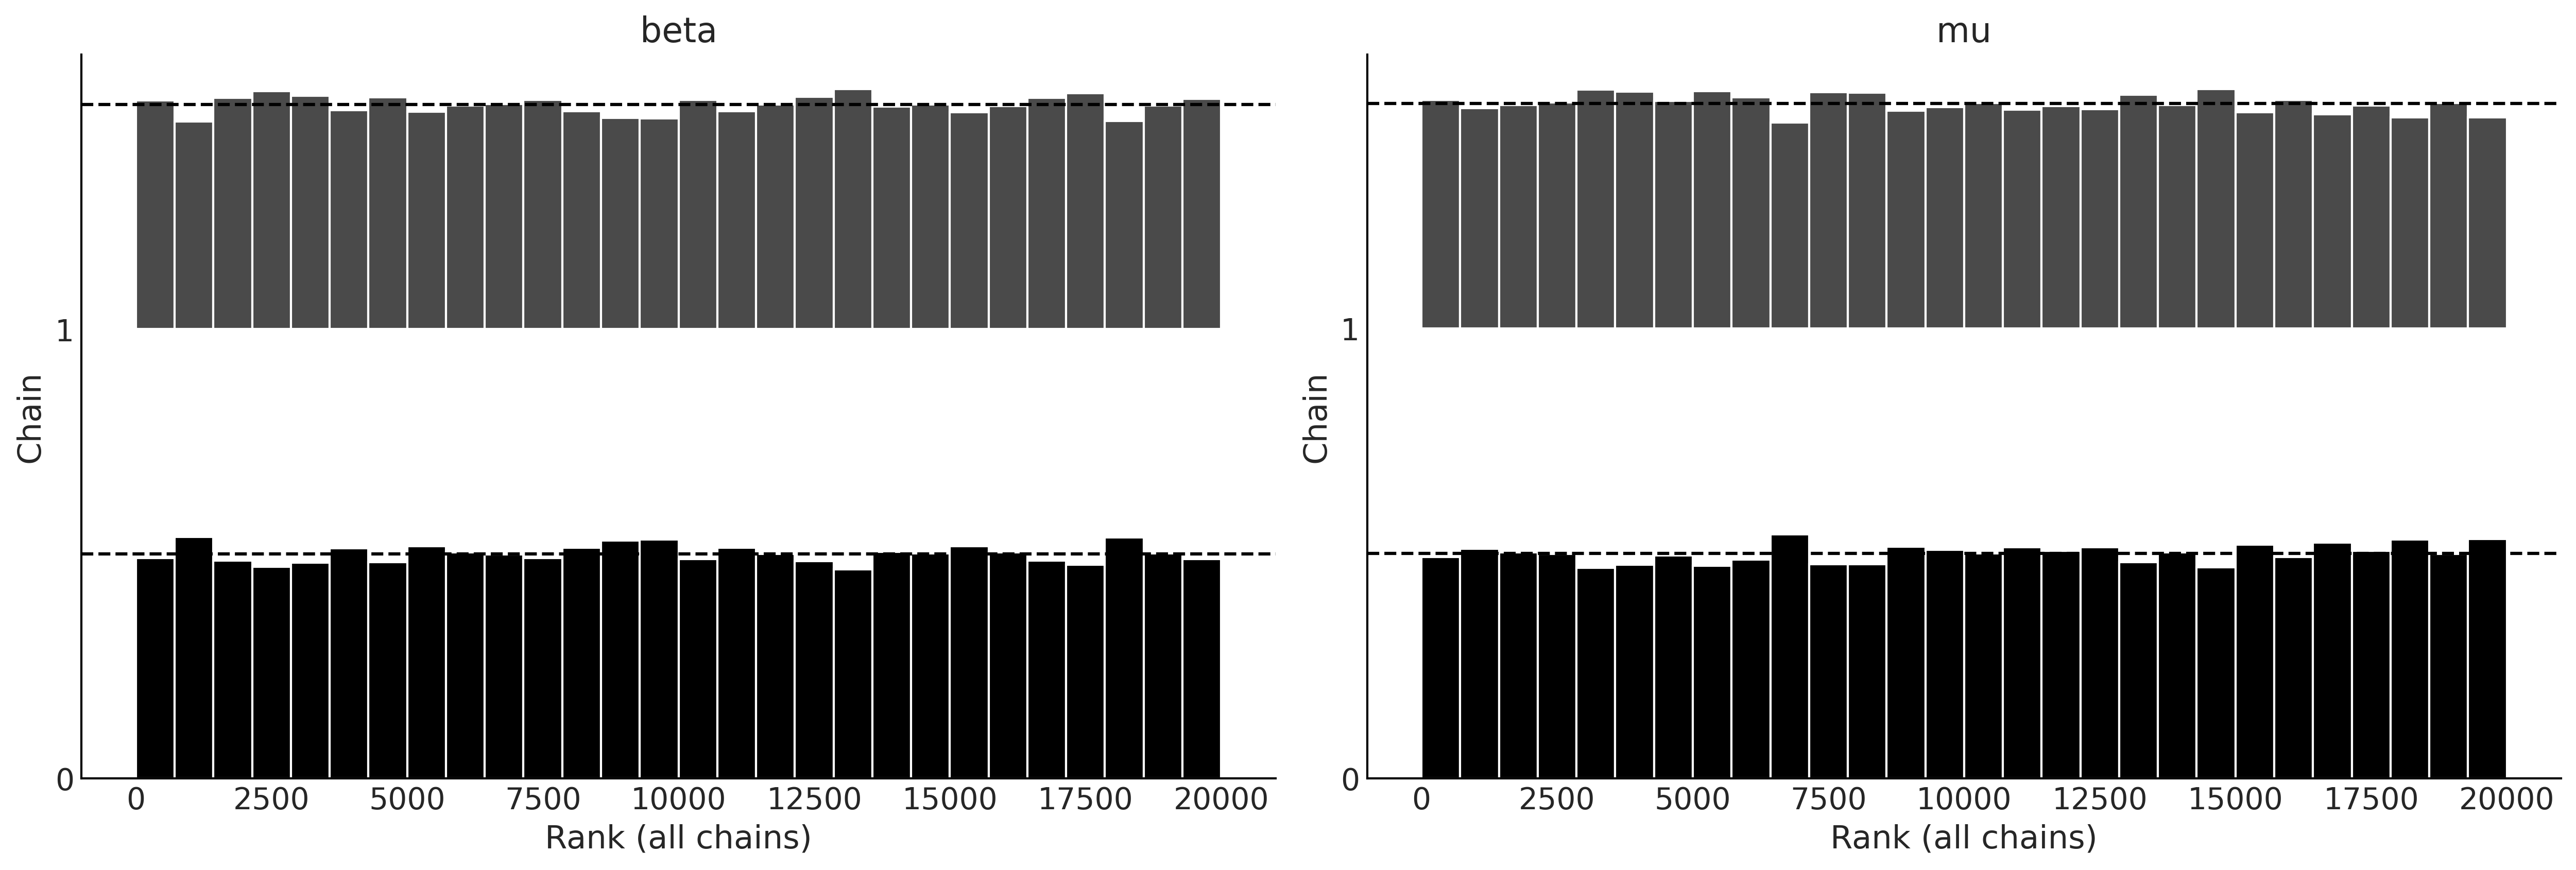

In [10]:
with gumbel_model:
    gumbel_data = pm.sample(random_seed=0, chains=2, draws=10000, idata_kwargs={"log_likelihood": True})
    az.plot_rank(gumbel_data)
plt.savefig('img/chp09/rank_plot_bars_gumbel.png')

(posterior-plots)=

## 9.6. Posterior Plots

As we have discussed posterior plots are primarily used to visualize the
posterior distribution. Sometimes a posterior plot is the end goal of an
analysis, see {ref}`applied_experimental_example` for an example. In
some other cases direct inspection of the posterior distribution is of
very little interest. This is the case for our airline example which we
elaborate on further below.

(applied-example-posterior-of-flight-delays-models)=

### 9.6.1. Applied Example: Posterior of Flight Delays Models

After ensuring there are no inference errors in our model we quickly
check the posterior plots of the Normal and Gumbel models in Figures
{numref}`fig:posterior_plot_normal` and
{numref}`fig:posterior_plot_gumbel`. At a glance they look well formed,
with no unexpected aberrations. In both distributions, from a domain
perspective it is reasonable to see the mean value for $\mu$ estimated
below zero, indicating that most planes are on time. Other than those
two observations the parameters themselves are not very meaningful.
After all your boss needs to make a decision of whether to stay with the
current fee structure or accept the airlines proposal for a new one.
Given that a decision is the goal of our analysis, after a quick sanity
check we continue with the workflow.

```{figure} figures/posterior_plot_delays_normal.png
:name: fig:posterior_plot_normal
:width: 8.00in
Posterior plot for Normal model. Both distributions looks reasonably
formed and there are no divergences adding more evidence that our
sampler has reasonably estimated the parameters.
```

```{figure} figures/posterior_plot_delays_gumbel.png
:name: fig:posterior_plot_gumbel
:width: 8.00in
Posterior plot for Gumbel model parameters. Similar to
{numref}`fig:posterior_plot_normal` these estimates look well formed and
give us confidence in our parameter estimates.
```

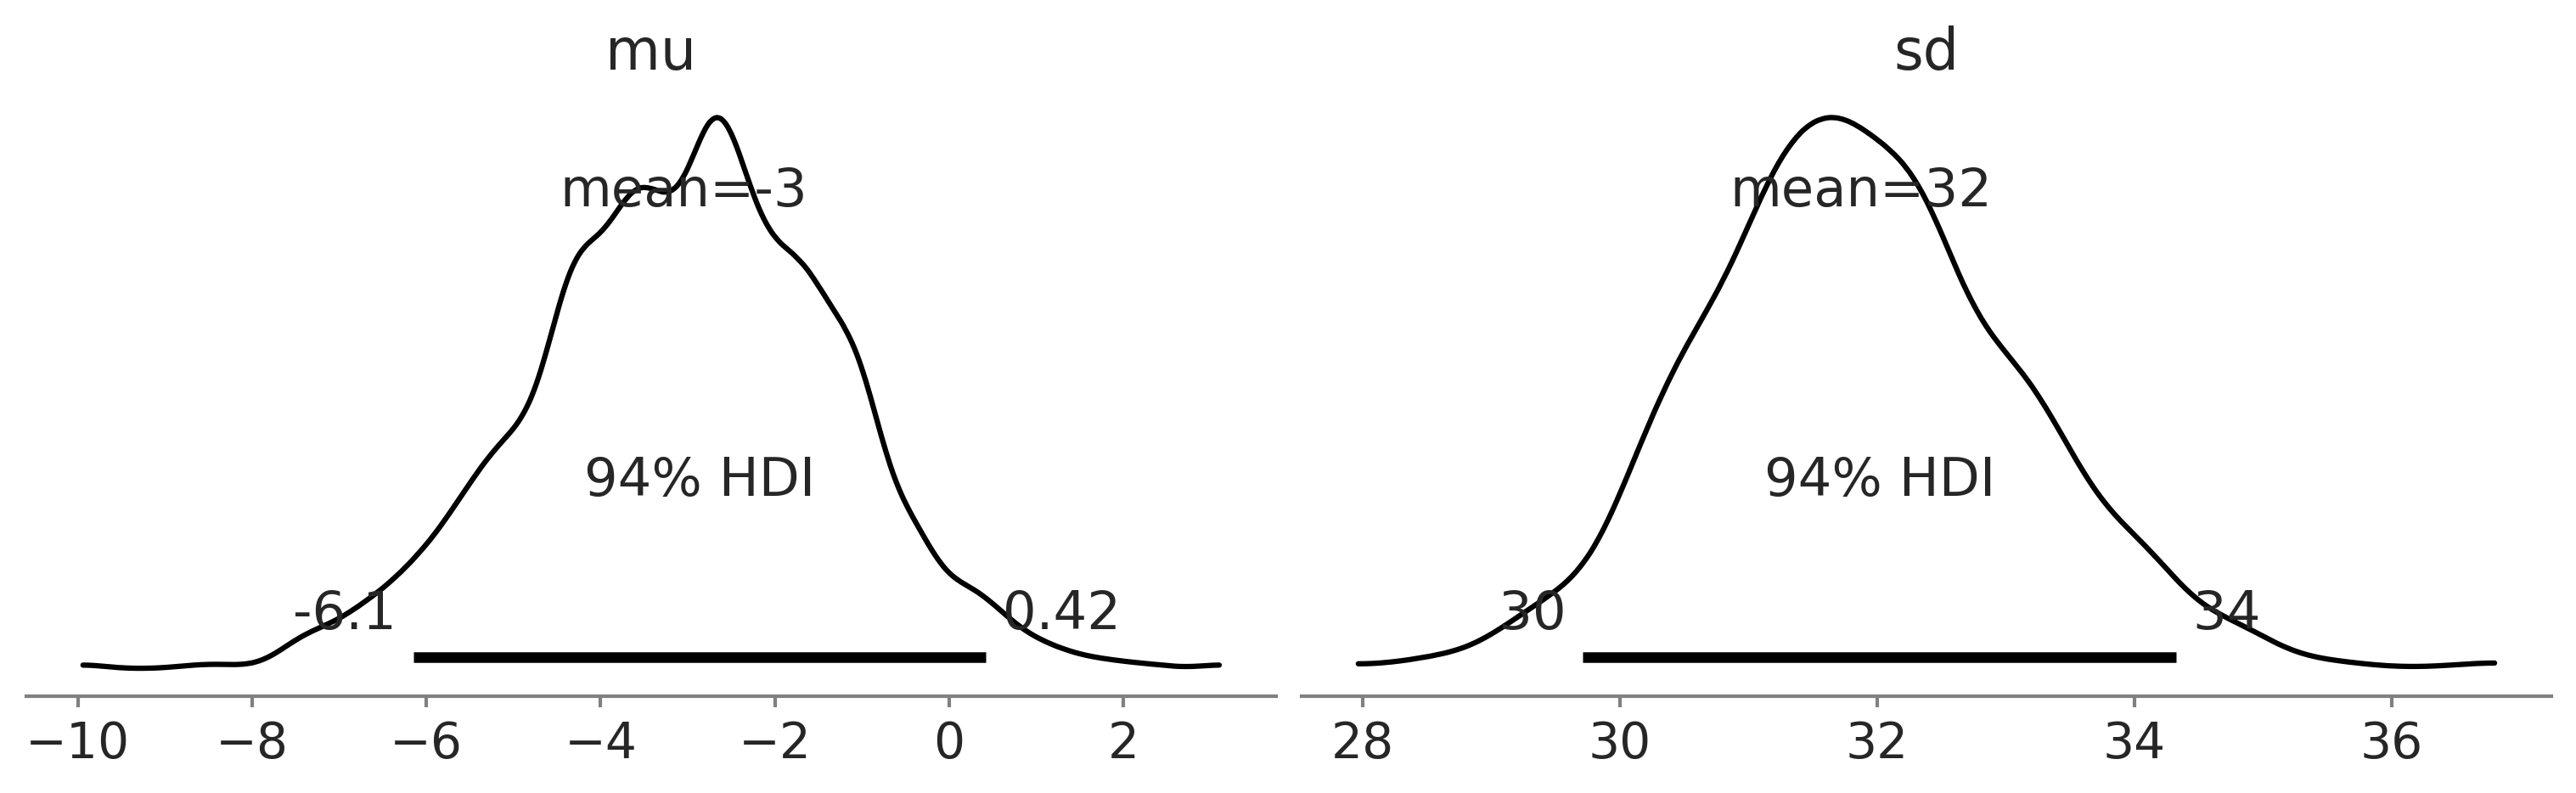

In [11]:
az.plot_posterior(normal_data, figsize=(10, 3))
plt.savefig('img/chp09/posterior_plot_delays_normal.png');

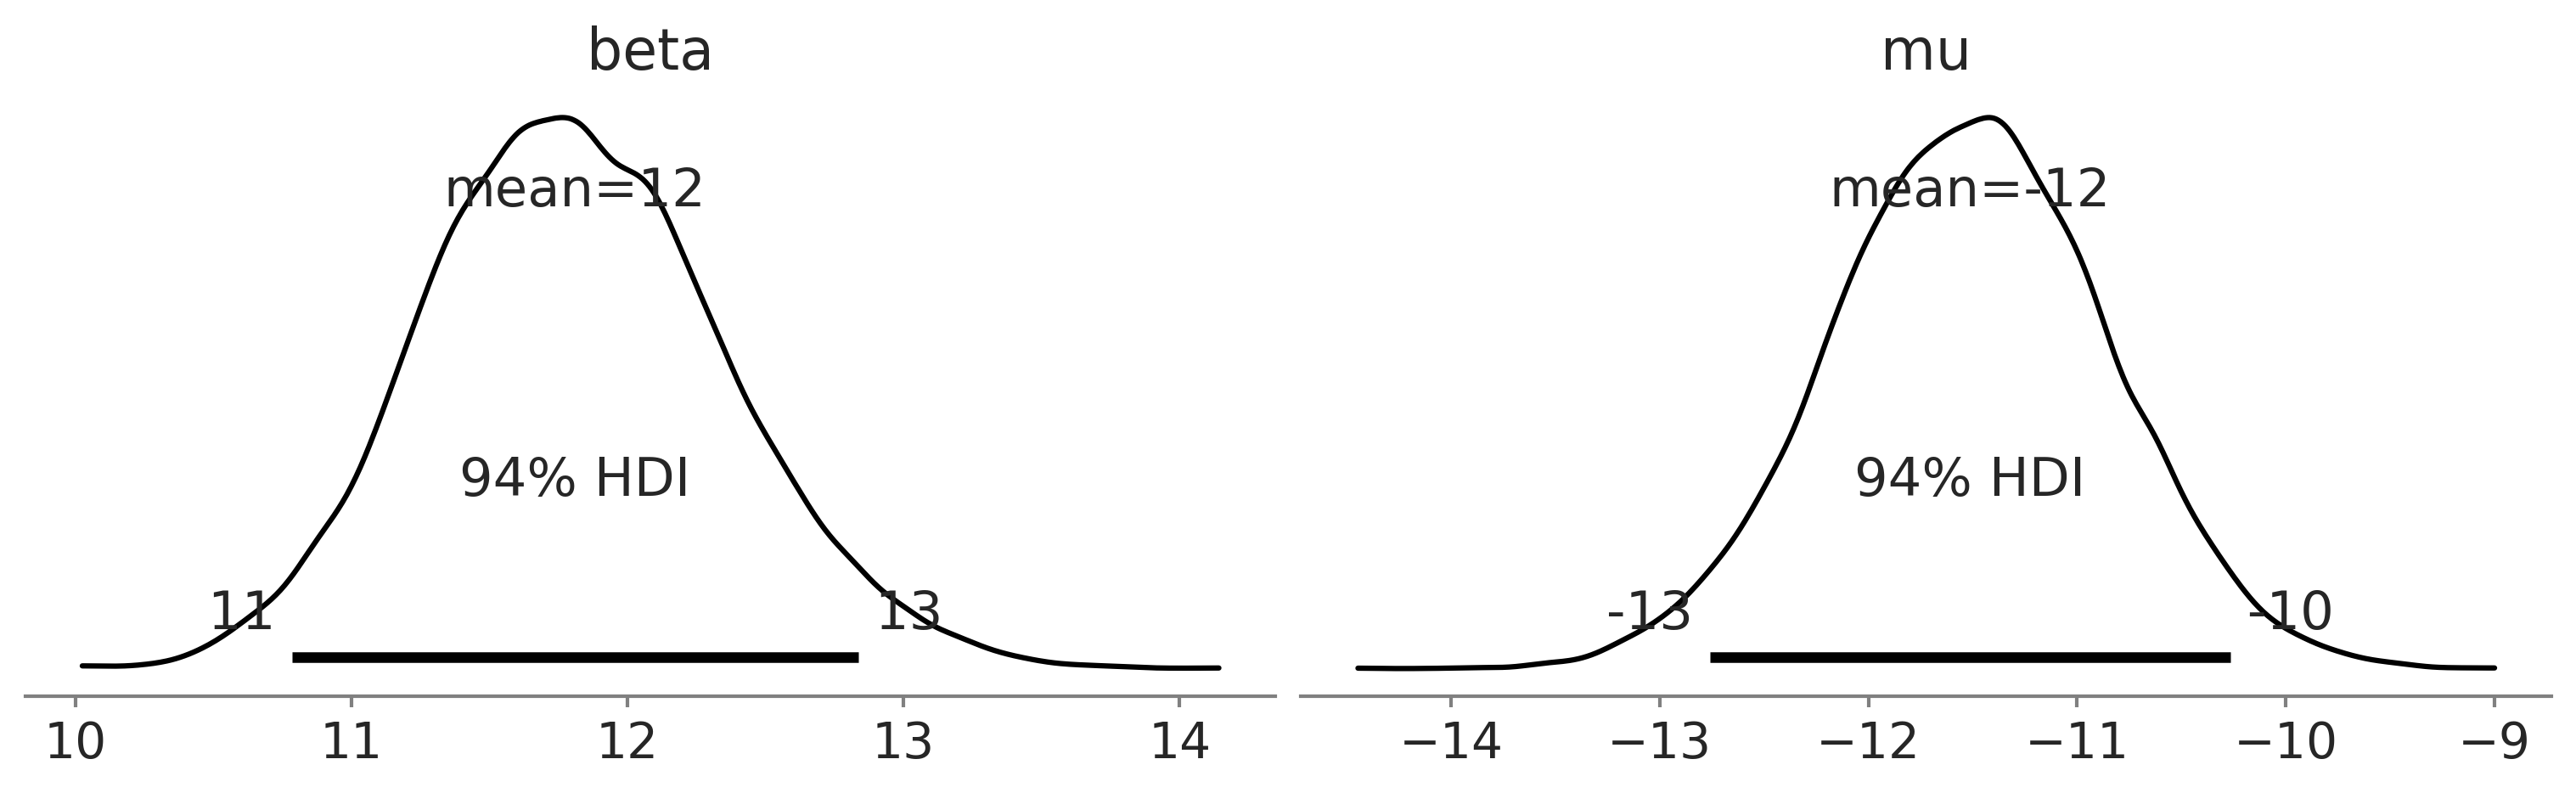

In [12]:
az.plot_posterior(gumbel_data, figsize=(10, 3))
plt.savefig('img/chp09/posterior_plot_delays_gumbel.png');

(workflow_posterior_predictive)=

## 9.7. Evaluating Posterior Predictive Distributions

As shown in the workflow in {numref}`fig:BayesianWorkflow`, a Bayesian
analysis does not concludes once the posterior estimates are obtained.
We can take many additional steps, like for example generating posterior
predictive distributions if any of the following are desired.

-   We want to use posterior predictive checks to evaluate our model
    calibration.

-   We want to obtain predictions or perform counterfactual analyses

-   We want to be able to communicate our results in the units of the
    observed data, and not in term of the parameters of our model.

We specified the mathematical definition for a posterior predictive
distribution in Equation [eq:post_pred_dist](eq:post_pred_dist).
Using modern PPLs sampling from the posterior predictive distribution is
easy as adding a couple lines of code shown in Code Block
[posterior_predictive_airlines](posterior_predictive_airlines).

(applied-example-posterior-predictive-distributions-of-flight-delays)=

### 9.7.1. Applied Example: Posterior Predictive Distributions of Flight Delays

In our airline example we have been asked to help make a decision based
on unseen future flight delays. To do that we will need estimates of the
distribution of future flight delays. Currently however, we have two
models and need to pick between the two. We can use posterior predictive
checks to evaluate the fit against the observed data visually as well as
using test statistics to compare certain specific features.

Let us generate posterior predictive samples for our Normal likelihood
model shown in Code Block
[posterior_predictive_airlines](posterior_predictive_airlines).


```{code-block} python
:name: posterior_predictive_airlines
:caption: posterior_predictive_airlines

with normal_model:
    normal_delay_trace = pm.sample(random_seed=0)
    normal_ppc = pm.sample_posterior_predictive(normal_delay_trace)
    normal_data = az.from_pymc3(trace=normal_delay_trace,
                            posterior_predictive=normal_ppc)
```

```{figure} figures/Delays_Model_Posterior_Predictive.png
:name: fig:Delays_Model_Posterior_Predictive
:width: 8.00in
Posterior predictive checks for Normal and Gumbel models. The Normal
model does not capture the long tail well and also return more
predictions below the bound of the observed data. The Gumbel model fit
is better but there is still quite a bit of mismatch for values below 0
and the tail.
```

In [13]:
with normal_model:
    normal_data = pm.sample(random_seed=0, idata_kwargs={"log_likelihood": True})
    normal_data.extend(pm.sample_posterior_predictive(normal_data, random_seed=0))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [delays]


Output()

array([<Axes: xlabel='delays'>], dtype=object)

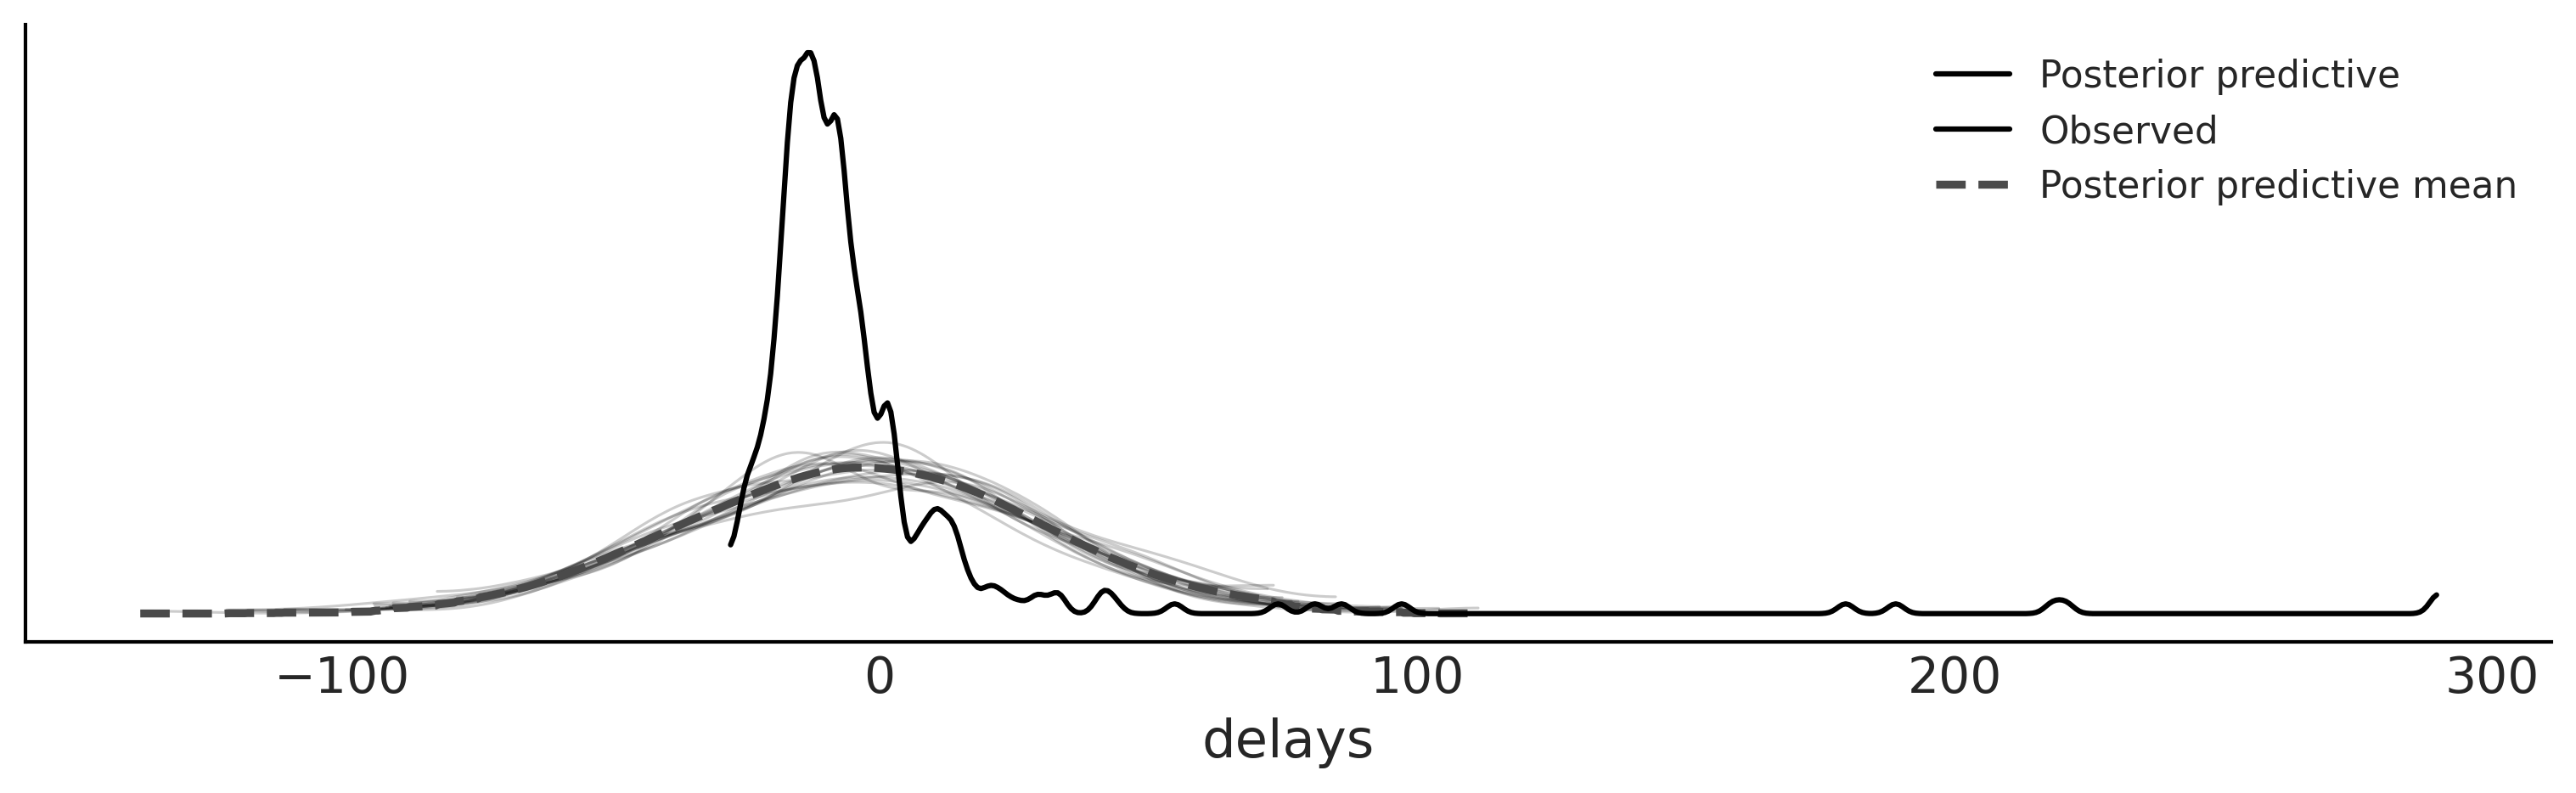

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
az.plot_ppc(normal_data, observed=True, num_pp_samples=20, ax=ax)

In [15]:
with gumbel_model:
    gumbel_data.extend(pm.sample_posterior_predictive(gumbel_data, random_seed=0))

Sampling: [delays]


Output()

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/plots/ppcplot.py:242: FutureWarning: color has been deprecated in favor of colors
  warnings.warn("color has been deprecated in favor of colors", FutureWarning)


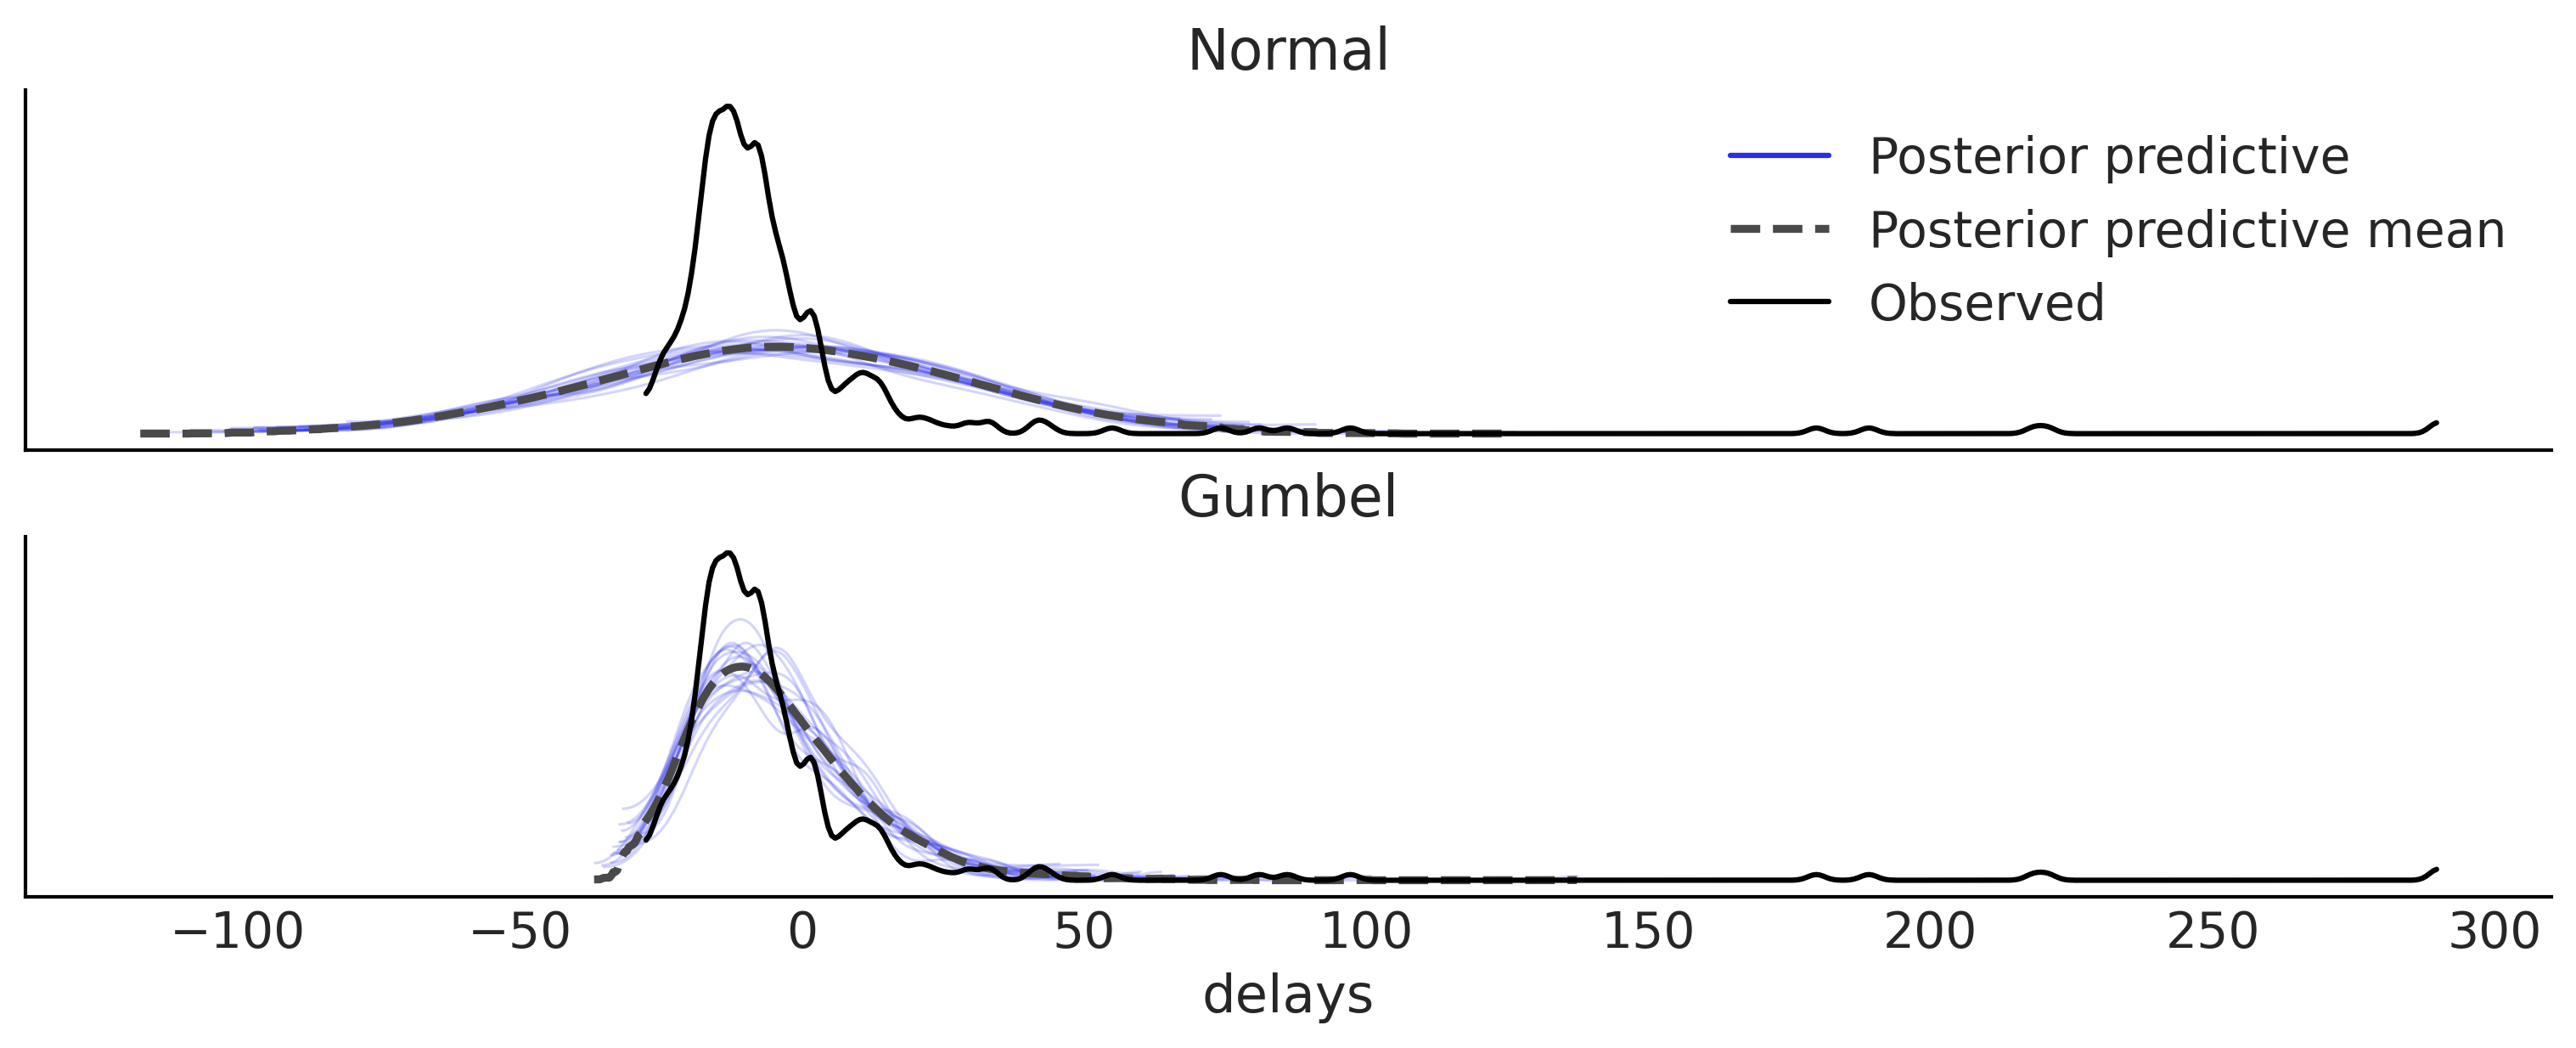

In [16]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(10, 4))

az.plot_ppc(normal_data, observed=False, num_pp_samples=20, ax=ax[0], color="C4")
az.plot_kde(msn_arrivals.values, ax=ax[0], label="Observed");

az.plot_ppc(gumbel_data, observed=False, num_pp_samples=20, ax=ax[1], color="C4")
az.plot_kde(msn_arrivals.values, ax=ax[1], label="Observed");
ax[0].set_title("Normal")
ax[0].set_xlabel("")
ax[1].set_title("Gumbel")
ax[1].legend().remove()
plt.savefig("img/chp09/delays_model_posterior_predictive.png")

From {numref}`fig:Delays_Model_Posterior_Predictive` we can see that the
Normal model is failing to capture the distribution of arrival times.
Moving onto the Gumbel model we can see that the posterior predictive
samples seem to do a poor job at predicting flights that arrive early,
but a better job at simulating flights that arrive late. We can run
posterior predictive checks using two test statistics to confirm. The
first is to check the proportion of flights arriving late, and the
second is to check the median of flight delays (in minutes) between the
posterior predictive distribution and the observed data.
{numref}`fig:Arrival_Test_Statistics_for_Gumbel_Posterior_Predictive`
shows that the Gumbel model does a better job of fitting the median of
flight delays than the Normal model, but does a poor job of fitting the
proportion of on time arrivals. The Gumbel model also does a better job
of fitting the median of flight delays.

```{figure} figures/Arrival_Test_Statistics_for_Gumbel_Posterior_Predictive.png
:name: fig:Arrival_Test_Statistics_for_Gumbel_Posterior_Predictive
:width: 8.00in
Posterior predictive checks with test statistics for Gumbel model. On
the left we see the estimated distribution of on time proportion
compared to the observed proportion. On the right is the test statistic
of median minutes late. It seems the Gumbel model is better at
estimating how late a flight will be versus what proportion of flights
will be late.
```

In [17]:
gumbel_late = gumbel_data.posterior_predictive["delays"].values.reshape(-1, 336).copy()
dist_of_late = (gumbel_late > 0).sum(axis=1) / 336

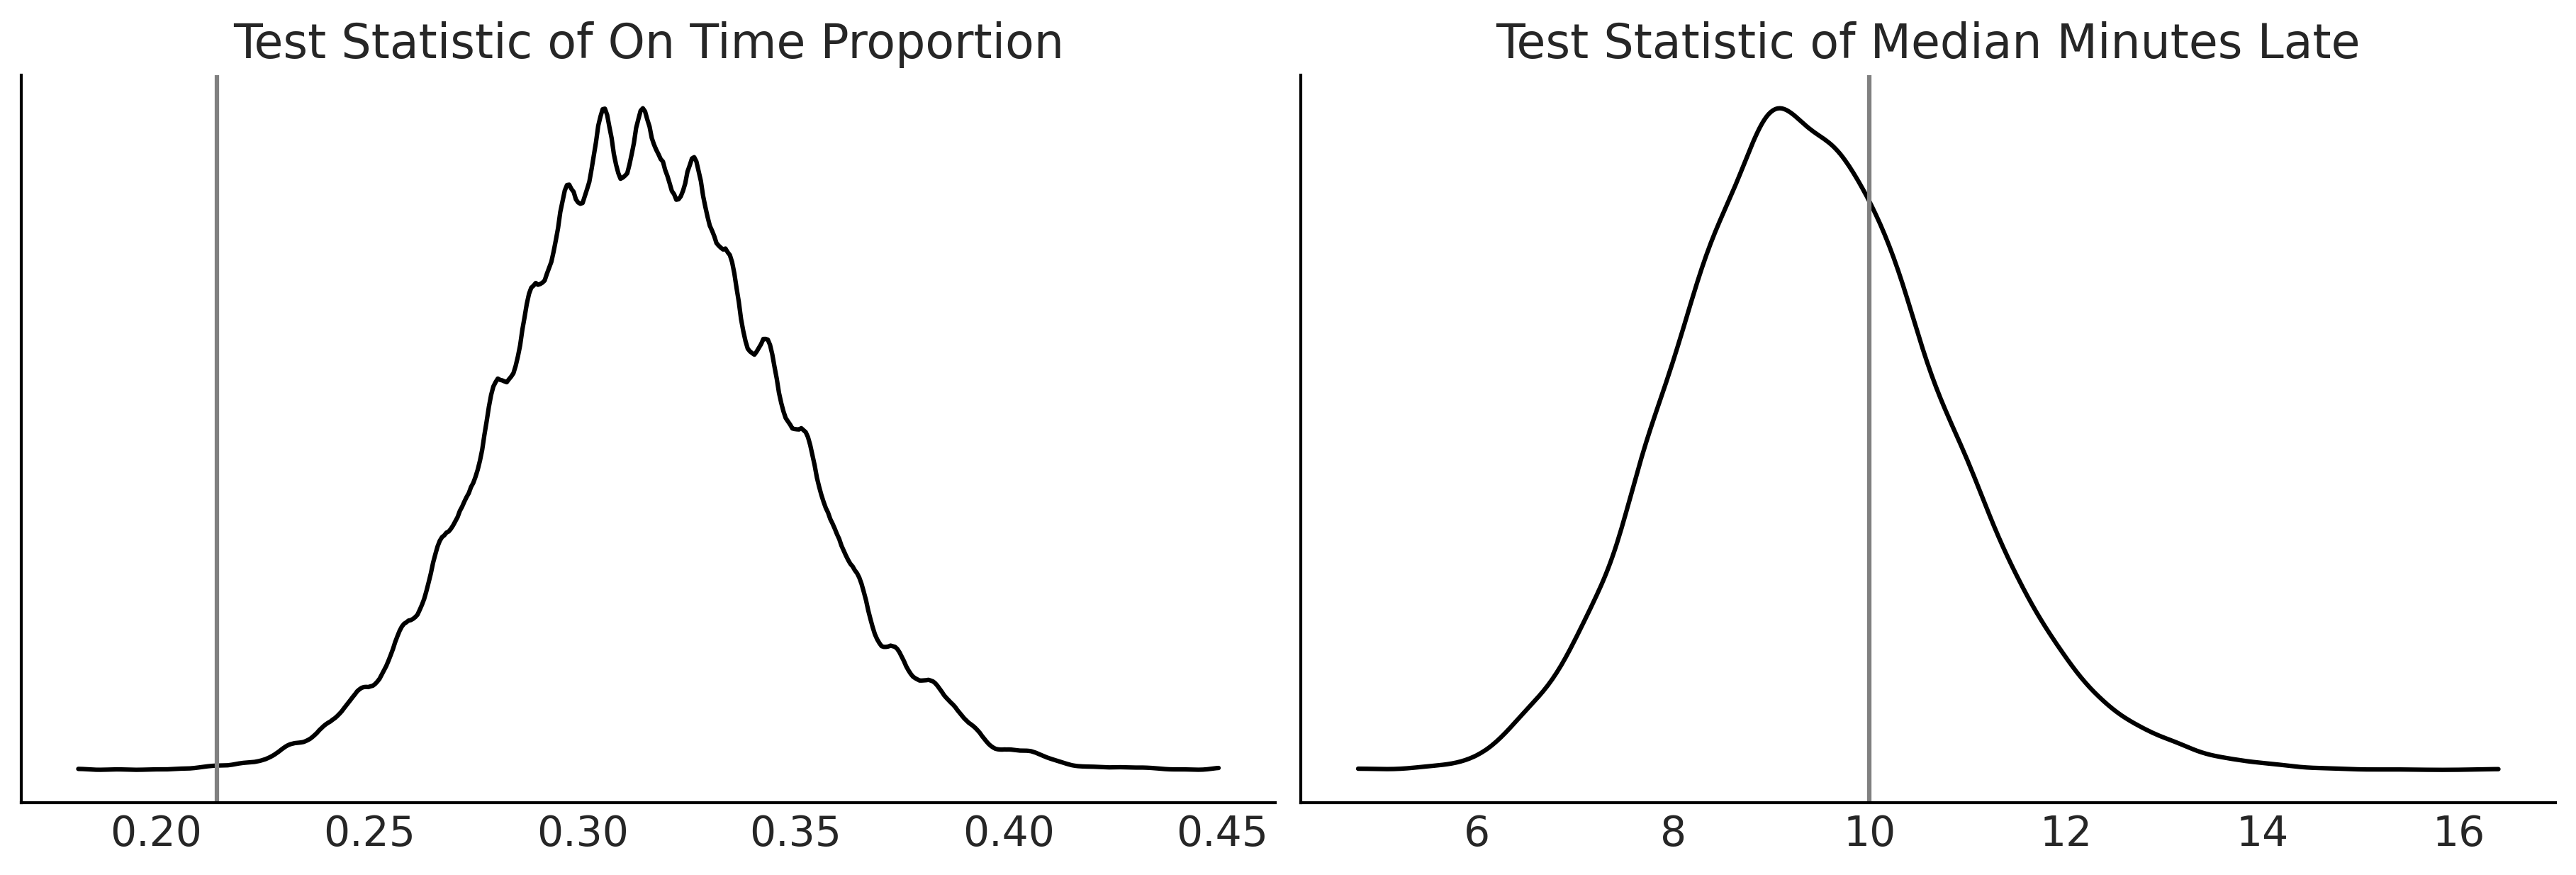

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

gumbel_late = gumbel_data.posterior_predictive["delays"].values.reshape(-1, 336).copy()
dist_of_late = (gumbel_late > 0).sum(axis=1) / 336
az.plot_dist(dist_of_late, ax=axes[0])

percent_observed_late = (msn_arrivals > 0).sum() / 336
axes[0].axvline(percent_observed_late, c="gray")
axes[0].set_title("Test Statistic of On Time Proportion")
axes[0].set_yticks([])


gumbel_late[gumbel_late < 0] = np.nan
median_lateness = np.nanmedian(gumbel_late, axis=1)
az.plot_dist(median_lateness,  ax=axes[1])

median_time_observed_late = msn_arrivals[msn_arrivals >= 0].median()
axes[1].axvline(median_time_observed_late, c="gray")
axes[1].set_title("Test Statistic of Median Minutes Late")
axes[1].set_yticks([])

plt.savefig("img/chp09/arrival_test_statistics_for_gumbel_posterior_predictive.png")

(model-comparison)=

## 9.8. Model Comparison

So far we have used posterior predictive checks to evaluate each model
independently. That type of evaluation is useful to understand each
model individually. When we have multiple models however, it begs the
question how models perform relative to each other. Model comparison can
further help us understand in what regions one model may be performing
well, where another is struggling, or which data points are particularly
challenging to fit.

(applied-example-model-comparison-with-loo-of-flight-delays)=

### 9.8.1. Applied Example: Model Comparison with LOO of Flight Delays

For our flight delay model we have two candidate models. From our
previous visual posterior predictive check it seemed clear that the
Normal likelihood did not tend to fit the skewed distribution of flight
delays well, particularly compared to the Gumbel distribution. We can
verify this observation using the comparison method in ArviZ:


```{code-block} python
:name: delays_comparison
:caption: delays_comparison

compare_dict = {"normal": normal_data,"gumbel": gumbel_data}
comp = az.compare(compare_dict, ic="loo")
comp
```


```{list-table} Summary of model comparison for the gumbel and normal models
:name: tab:airline_delays_loo
* -
  - **rank**
  - **loo**
  - **p_loo**
  - **d_loo**
  - **weight**
  - **se**
  - **dse**
  - **warning**
  - **loo_scale**
* - gumbel
  - 0
  - -1410.39
  - 5.85324
  - 0
  - 1
  - 67.4823
  - 0
  - False
  - log
* - normal
  - 1
  - -1654.16
  - 21.8291
  - 243.767
  - 0
  - 46.1046
  - 27.5559
  - True
  - log
```

{numref}`tab:airline_delays_loo`, generated with Code Block
[delays_comparison](delays_comparison), shows the model
ranked by their ELPD. It should be no surprise that the Gumbel model
does much better job modeling the observed data.

```{figure} figures/loo_pit_delays.png
:name: fig:loo_pit_delays
:width: 8.00in
Model calibration using LOO-PIT. We can see that both models have
problems at capturing the same portion of the data. The models are
underestimating the largest observations (largest delays) and over
estimating earlier arrivals. These observations are in line with
{numref}`fig:Delays_Model_Posterior_Predictive`. Even when both models
show problems the Gumbel model has smaller deviations from the expected
Uniform distribution.
```

```{figure} figures/elpd_plot_delays.png
:name: fig:elpd_plot_delays
:width: 8.00in
Top panel ELPD difference between the Gumbel and Normal model. The 3
observations with the largest deviation are annotated (157, 158 and
164). Bottom panels, plots for the $\hat \kappa$ values from the Pareto
smooth importance sampling. Observations 157, 158 and 164 has values
larger than 0.7
```

In [19]:
compare_dict = {"normal": normal_data,"gumbel": gumbel_data}
comp = az.compare(compare_dict)
comp

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
gumbel,0,-1410.189855,5.658789,0.000000,1.0,45.495216,0.000000,False,log
normal,1,-1652.948272,21.390468,242.758417,0.0,65.636294,27.602004,True,log


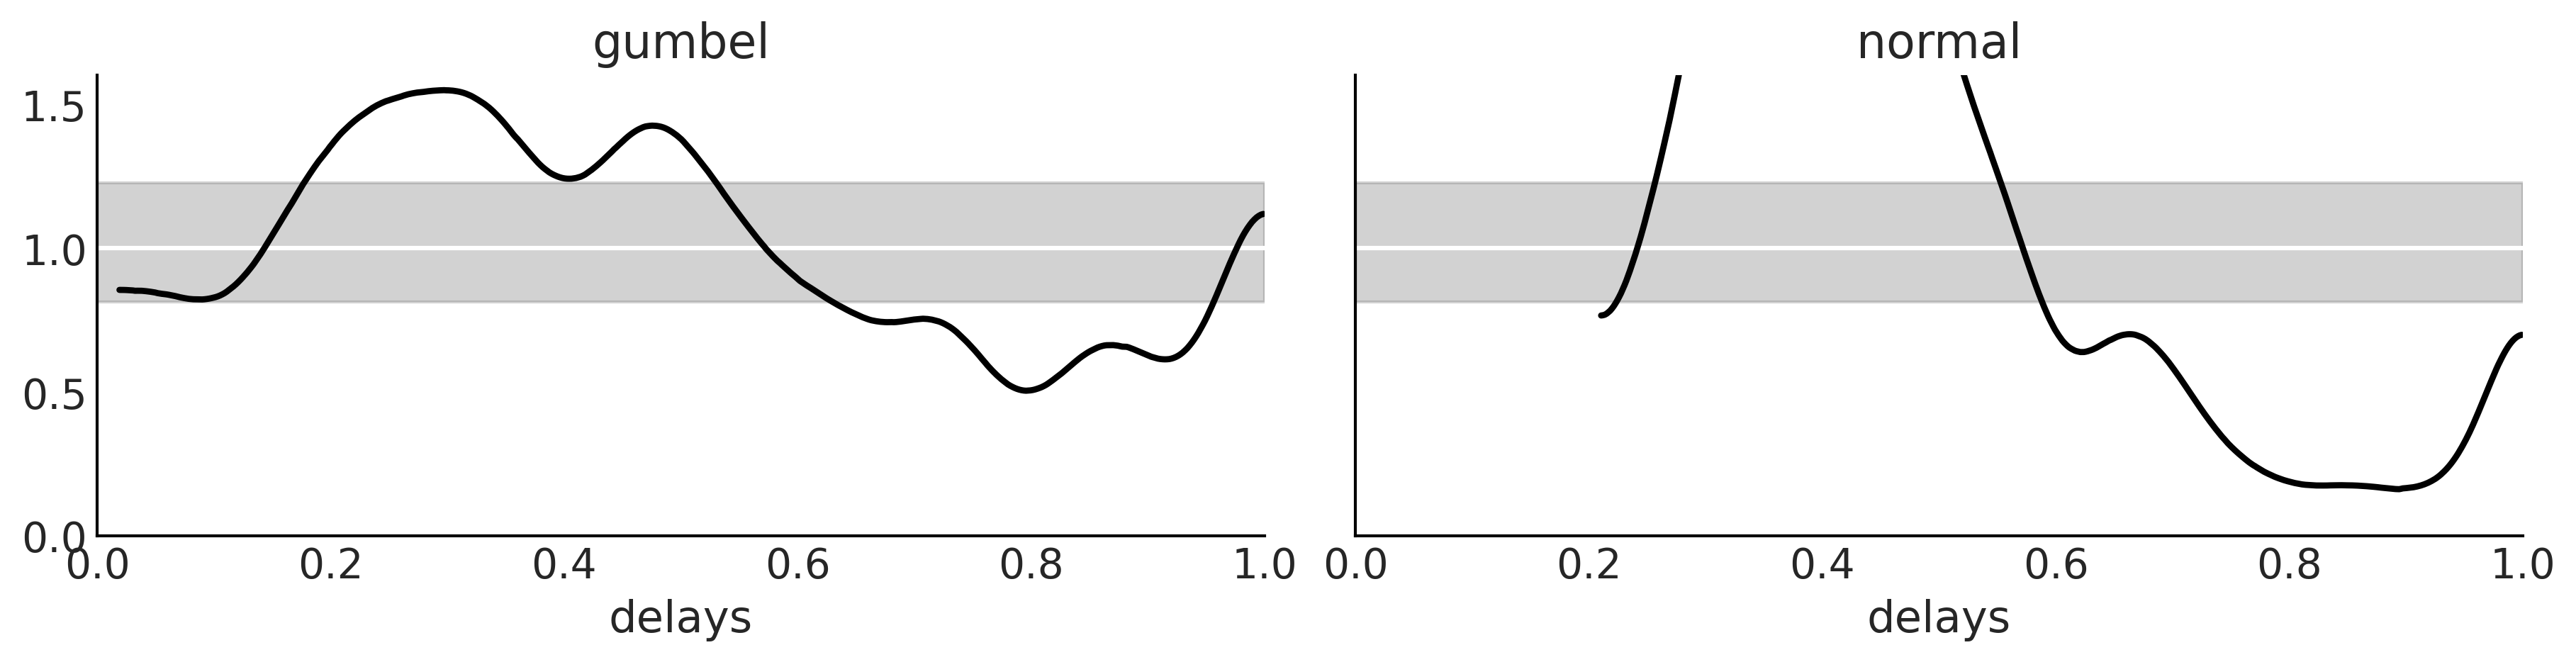

In [20]:
_, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for label, model, ax in zip(("gumbel", "normal"),(gumbel_data, normal_data), axes):
    az.plot_loo_pit(model, y="delays", legend=False, use_hdi=True, ax=ax)
    ax.set_title(label)
    
plt.savefig('img/chp09/loo_pit_delays.png')

In [21]:
cmp_dict = {"gumbel": gumbel_data,
            "normal": normal_data}
            
cmp = az.compare(cmp_dict)
cmp

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
gumbel,0,-1410.189855,5.658789,0.000000,1.0,45.495216,0.000000,False,log
normal,1,-1652.948272,21.390468,242.758417,0.0,65.636294,27.602004,True,log


From {numref}`tab:airline_delays_loo` we can see that the Normal
model is giving a value of `p_loo` way higher than the number of
parameters in the model, showing the model is missespecified. Also we
are getting a warning indicating that we have at least one high value of
$\hat \kappa$. From {numref}`fig:elpd_plot_delays` (bottom right panel)
we can see that the offending observation is the datapoint 157. From top panel we can
also see (Figure {numref}`fig:elpd_plot_delays` top panel) that the
Normal model is having a hard time at capturing this observation
together with observations 158 and 164. Inspection of the data reveals
that these 3 observations are the ones with the largest delays.

We can also generate a visual check with Code Block
[delays_comparison_plot](delays_comparison_plot) which
results in {numref}`fig:model_comparison_airlines`. We see that even
when considering the uncertainty in LOO the Gumbel model is better
representation of the data than the Normal model.


```{code-block} python
:name: delays_comparison_plot
:caption: delays_comparison_plot

az.plot_compare(comp)
```

```{figure} figures/model_comparison_airlines.png
:name: fig:model_comparison_airlines
:width: 8.00in
Model comparison using LOO of the two flight delay models from Code
Block [delays_comparison_plot](delays_comparison_plot). We
confirm our notion that the Gumbel data is better at estimating the
observed distribution than the Normal model.
```

From our previous comparison of the posterior predictive check, and our
direct LOO comparison, we can make the informed choice to proceed only
with the Gumbel model. This does not imply our Normal model was useless,
in fact quite the opposite. Developing multiple models helps build
confidence in our selection of one, or a subset of models. It also does
not mean that the Gumbel model is the true or even the best possible
model, in fact we have evidence of it shortcomings. Thus, there is still
room for improvement if we explore different likelihoods, collect more
data, or make some other modification. What is important at this step is
that we are sufficiently convinced that the Gumbel model is the most
"adequate\" model from all the reasonable models we have evaluated.

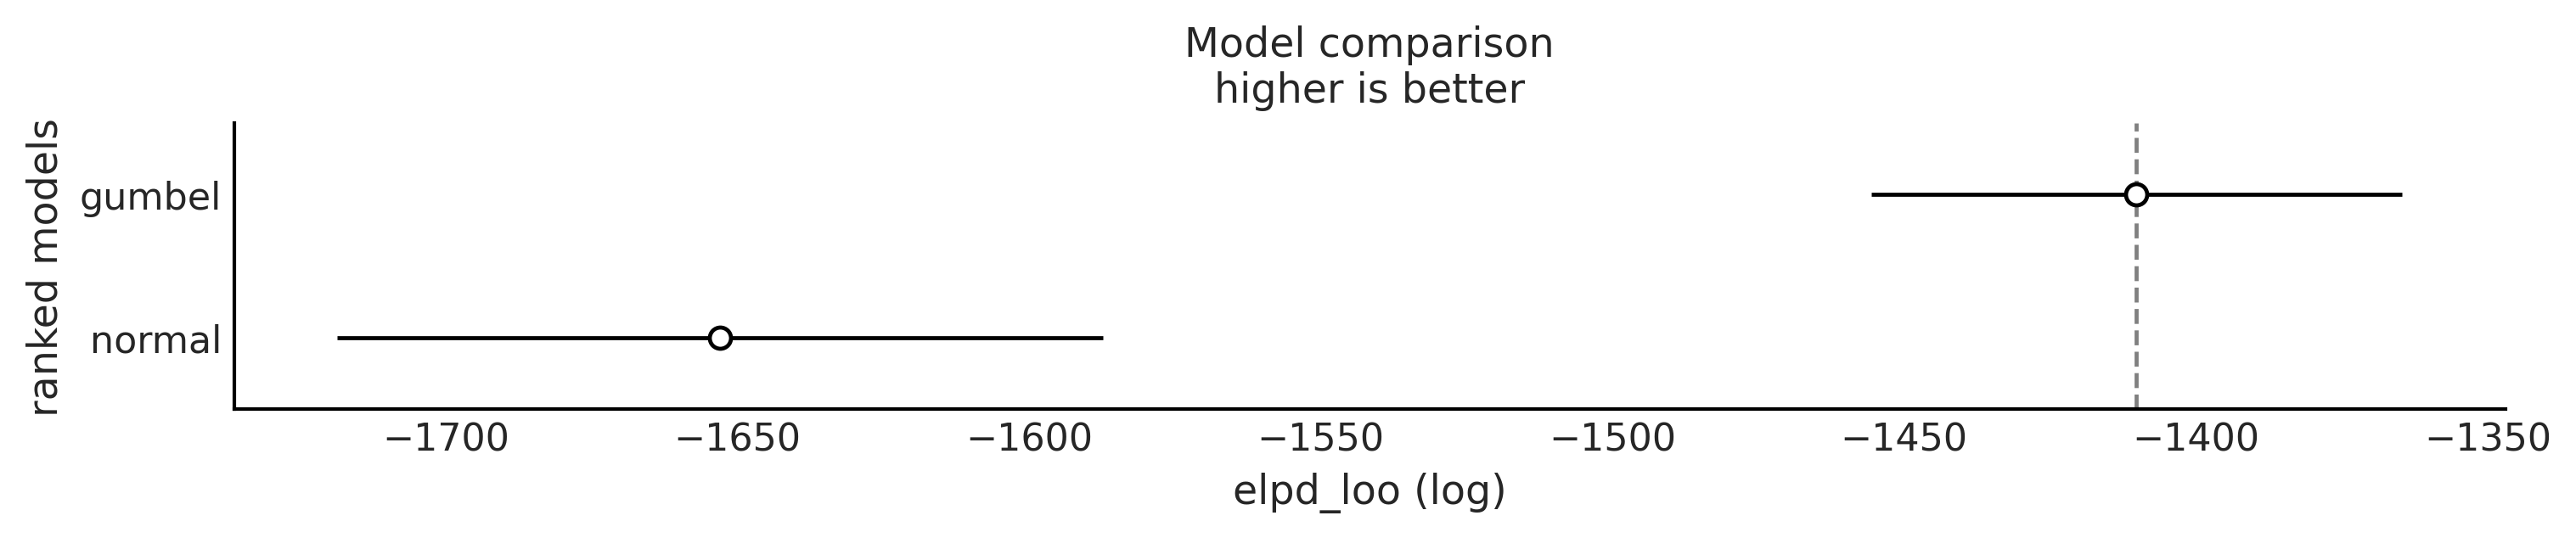

In [22]:
az.plot_compare(cmp, figsize=(10, 2))
plt.savefig("img/chp09/model_comparison_airlines.png")

In [23]:
gumbel_loo = az.loo(gumbel_data, pointwise=True)
normal_loo = az.loo(normal_data, pointwise=True)

/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/home/hwting/anaconda3/envs/rapids-24.12/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


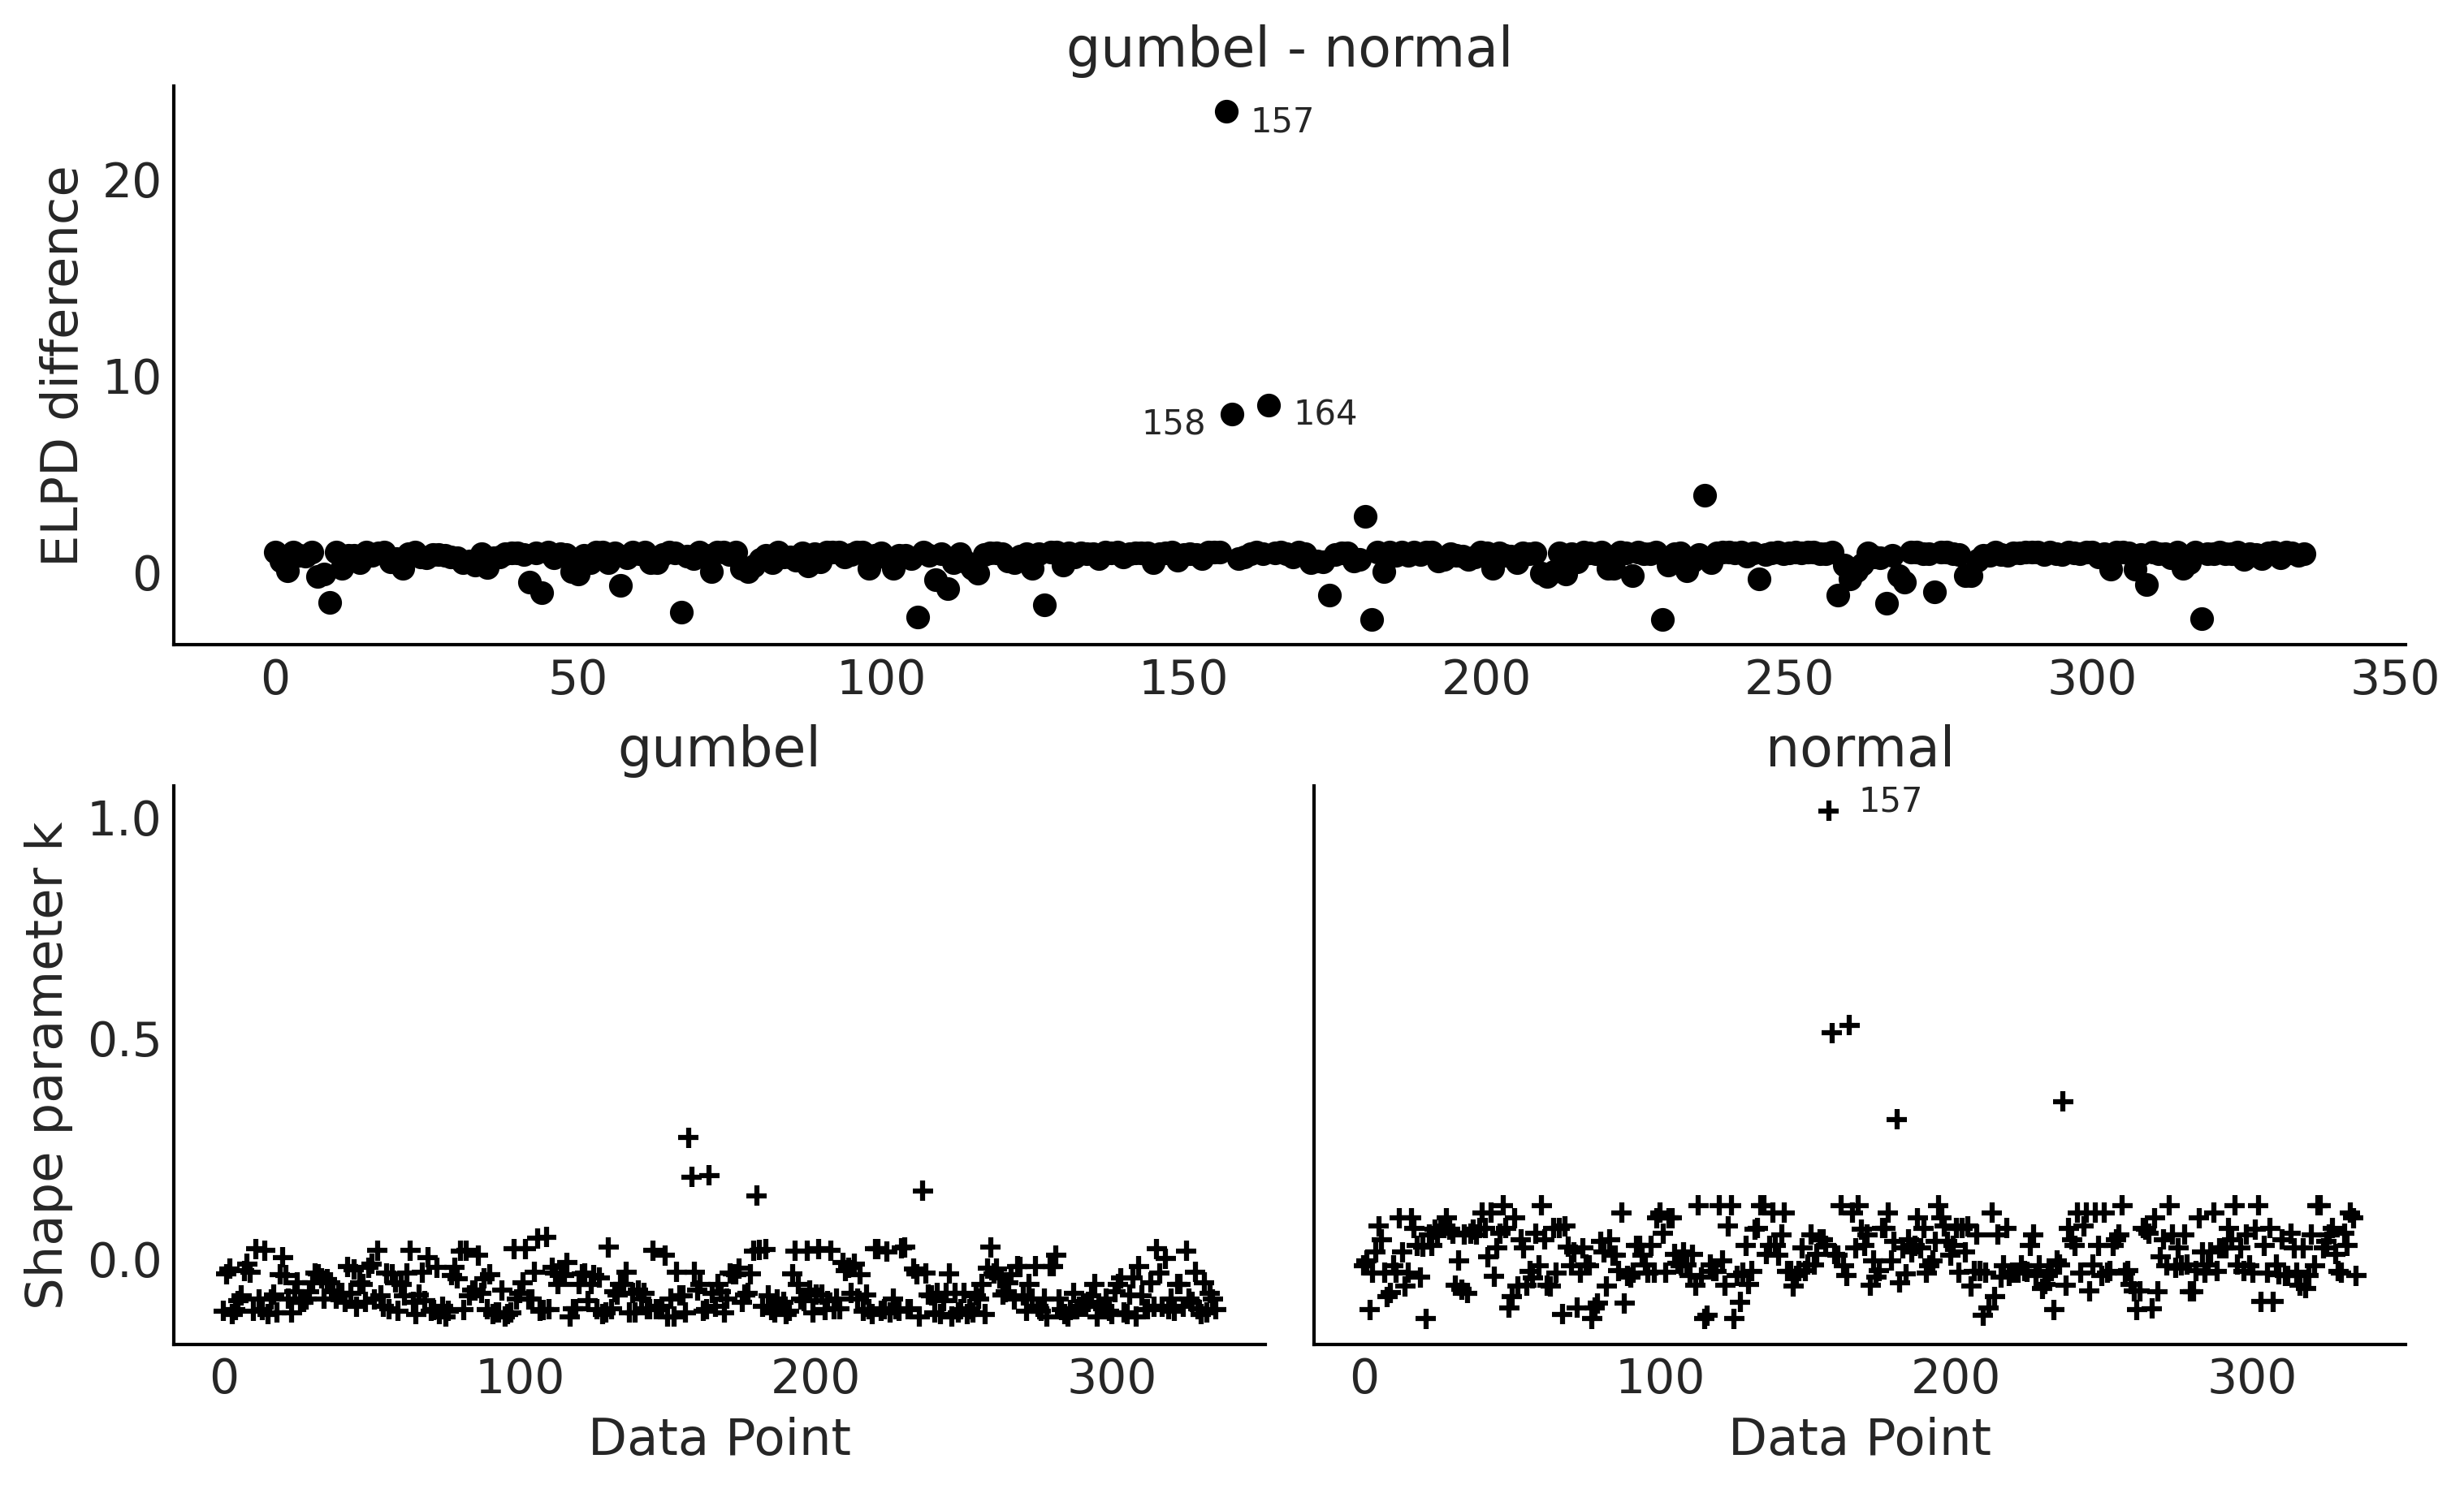

In [24]:
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])


diff = gumbel_loo.loo_i - normal_loo.loo_i
idx = np.abs(diff) > 4
x_values = np.where(idx)[0]
y_values = diff[idx].values
az.plot_elpd(cmp_dict, ax=ax)

for x, y, in zip(x_values, y_values):
    if x != 158:
        x_pos = x+4
    else:
        x_pos = x-15
    ax.text(x_pos, y-1, x)
    
for label, elpd_data, ax in zip(("gumbel", "normal"),
                                (gumbel_loo, normal_loo), (ax1, ax2)):
    az.plot_khat(elpd_data, ax=ax)
    ax.set_title(label)
    idx = elpd_data.pareto_k > 0.7
    x_values = np.where(idx)[0]
    y_values = elpd_data.pareto_k[idx].values
    for x, y, in zip(x_values, y_values):
        if x != 158:
            x_pos = x+10
        else:
            x_pos = x-30
        ax.text(x_pos, y, x)
    

#     ttl = ax.title
#    ttl.set_position([.5, 10])

ax1.set_ylim(ax2.get_ylim())
ax2.set_ylabel("")
ax2.set_yticks([])
plt.savefig('img/chp09/elpd_plot_delays.png');

(reward_functions)=

## 9.9. Reward Functions and Decisions

Throughout this book we have seen how converting a set of quantities in
one space to another allows us to make calculations simpler or shifts
our mode of thinking. For example, in the last section we used the
posterior predictive sampling to move from parameter space to observed
quantity space. Reward functions, also sometimes referred to as cost,
loss, or utility functions, are yet another transformation from observed
quantity space to the reward derived from an outcome (or the decision
space). Recall the example in Section {ref}`bart_bike` we have the posterior estimates
of the count of bikes rented in each hour (see e.g.
{numref}`fig:bart_bikes`. If we were instead interested in
revenue per day we could use a reward function to calculate the revenue
per rental and sum the total counts, effectively converting counts to
revenue. Another example is to estimate a person's level of happiness if
they are rained on, versus if they are dry. If we have a model and an
estimate of whether it will rain or not (based on weather data), and we
have a function that maps how wet or dry a person's clothes are to a
happiness value, we can map our weather estimate to an expected
happiness estimate.

Where reward functions become particularly useful is in the presence of
a decision. By being able to estimate all future outcomes, and map those
outcomes to expected rewards, you are able to make the choice that is
likely to yield the maximum reward. An intuitive example is deciding to
pack an umbrella in the morning. Carrying an umbrella is annoying, which
can be considered a negative reward, but being wet from rain is a worse
outcome. The choice of whether you pack an umbrella depends on how
likely it is to rain.

We can extend this example a bit more to expose a key idea. Let us say
you want to build a model that helps individuals in your family decide
when to pack an umbrella. You build a Bayesian model that will estimate
the probability it will rain, this is the inference portion. However,
after you build the model you learn your brother hates carrying an
umbrella so much he will never carry one unless it is already raining,
whereas your mother dislikes being wet so much she will preemptively
carry an umbrella even if there is not a cloud in the sky. In this case
the quantity under estimation, the probability it is going to rain, is
exactly the same, but because the reward differs, the action taken is
different. More specifically, the Bayesian portion of the model is
consistent, but the difference in reward yields a different action.

Neither rewards nor actions need to be binary, both can be continuous. A
classic example in supply chain is the newsvendor model [^1], in which a
newsvendor must decide how many newspapers to buy each morning when
demand is uncertain. If they buy too little they risk losing sales, if
they buy too many they lose money on unsold inventory.

Because Bayesian statistics provide full distributions we are able to
provide better estimates of future reward than methods that provide
point estimates [^2]. Intuitively we can get a sense of this when we
consider that Bayes' theorem includes features such as tail risk,
whereas point estimates will not.

With a generative Bayesian model, particularly a computational one, it
becomes possible to convert a posterior distribution of model parameters
of parameters, to a posterior predictive distributions in the domain of
observed units, to a distributional estimate of reward (in financial
units), to a point estimate of most likely outcome. Using this framework
we can then test the outcomes of various possible decisions.

[^1]: <https://en.wikipedia.org/wiki/Newsvendor_model>
    
[^2]: <www.ee.columbia.edu/\~vittorio/BayesProof.pdf>

In [25]:
posterior_pred = gumbel_data.posterior_predictive["delays"].values.reshape(-1, 336).copy()

### 9.9.1. Applied Example: Making Decisions Based on Flight Delays Modeling Result

Recall that delays are quite costly to the airport. In preparation for a
flight arrival the airport must ready the gate, have staff on hand to
direct the airplane when it lands, and with a finite amount of capacity,
late flights arrivals ultimately mean less flight arrivals. We also
recall the late flight penalty structure. For every minute late a flight
is, the airline must pay the airport a fee of 300 dollars. We can
convert this statement into a reward function in Code Block
[current_revenue](current_revenue).


```{code-block} python
:name: current_revenue
:caption: current_revenue

def current_revenue(delay):
    if delay >= 0:
        return 300 * delay
    return np.nan
```

In [26]:
@np.vectorize
def current_revenue(delay):
    """Calculates revenue """
    if delay >= 0:
        return 300.*delay
    return np.nan

Now given any individual late flight we can calculate the revenue we
will receive from the flight delay. Since we have a model can produce a
posterior predictive distribution of delays we can convert this into an
estimate of expected revenue as shown in Code Block
[reward_calculator](reward_calculator), which provides
both an array of revenue for each late flight, and the average estimate.


```{code-block} python
:name: reward_calculator
:caption: reward_calculator

def revenue_calculator(posterior_pred, revenue_func):    
    revenue_per_flight = revenue_func(posterior_pred)
    average_revenue = np.nanmean(revenue_per_flight)
    return revenue_per_flight, average_revenue

revenue_per_flight, average_revenue = revenue_calculator(posterior_pred,
current_revenue)
average_revenue
```

```none
3930.88
```

```{figure} figures/Late_fee_current_structure_hist.png
:name: fig:Late_fee_current_structure_hist
:width: 8.00in
Expected late flight revenue from current late fee structure calculated
using reward function and posterior predictive distribution. There are
very few very late flights hence the seemingly empty right portion of
the plot.
```

In [27]:
def revenue_calculator(posterior_pred, revenue_func):    
    revenue_per_flight = revenue_func(posterior_pred)
    average_revenue = np.nanmean(revenue_per_flight)
    return revenue_per_flight, average_revenue

In [28]:
revenue_per_flight, average_revenue = revenue_calculator(posterior_pred, current_revenue)
average_revenue

3896.568586916486

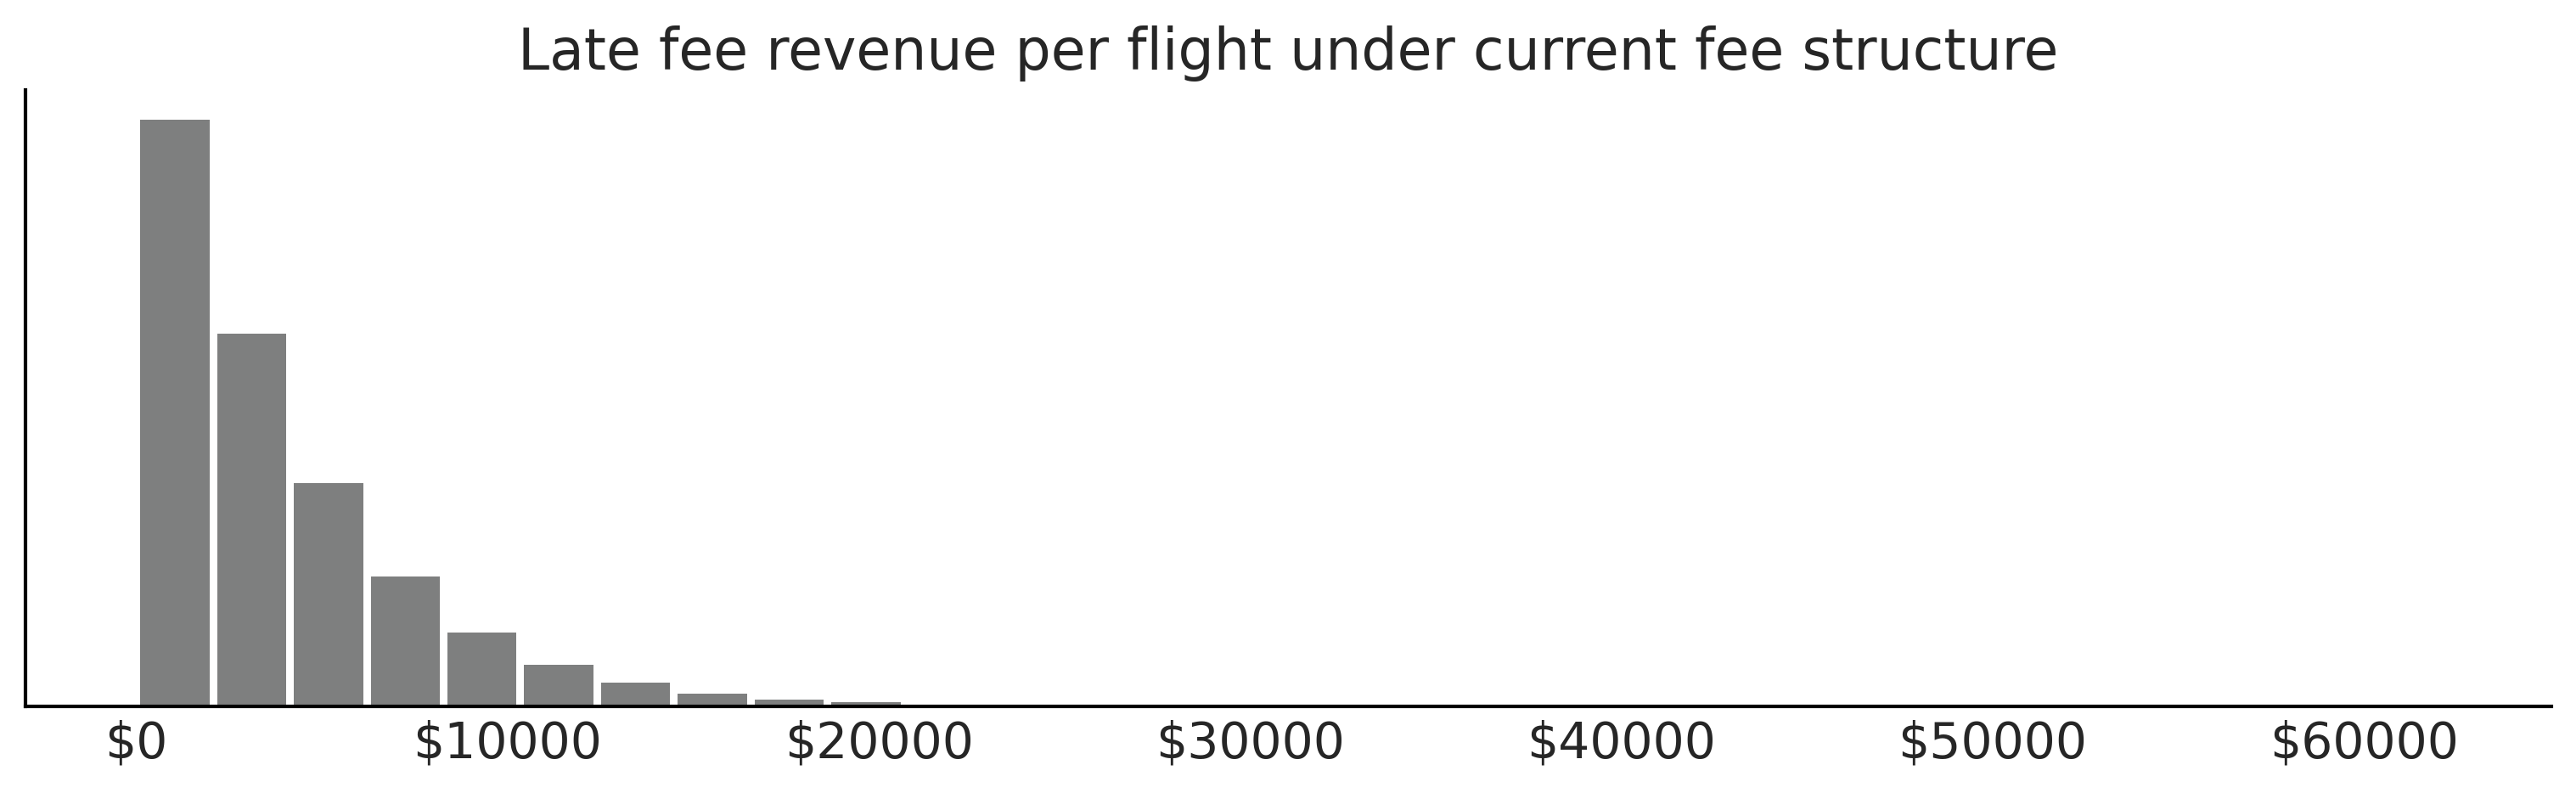

In [29]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(revenue_per_flight.flatten(), bins=30, rwidth=.9, color="C2" )
ax.set_yticks([])
ax.set_title("Late fee revenue per flight under current fee structure")
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.savefig("img/chp09/late_fee_current_structure_hist.png")

From the posterior predictive distribution and the current late fee
structure we expect each late flight to provide 3930 dollars of revenue
on average. We can also plot the distribution of late flight revenue per
flight in {numref}`fig:Late_fee_current_structure_hist`.

Recalling the cost structure proposed by the airline, if a flight is
between 0 and 10 minutes late, the fee is 1,000 dollars. If the flight
is between 10 and 300 minutes late the fee is 5,000 dollars, and if more
than 100 minutes late the fee is 30,000 dollars. Assuming that the cost
structure has no effect on the on time or late arrival of planes, you
are able to estimate the revenue under the new proposal by writing a new
cost function and reusing the previously calculated posterior predictive
distribution.

```python
@np.vectorize
def proposed_revenue(delay):
    """Calculate proposed revenue for each delay """
    if delay >= 100:
        return 30000
    elif delay >= 10:
        return 5000
    elif delay >= 0:
        return 1000
    else:
        return np.nan
revenue_per_flight_proposed, average_revenue_proposed = revenue_calculator(posterior_pred, proposed_revenue)
```

```none
2921.97
```

```{figure} figures/Late_fee_proposed_structure_hist.png
:name: fig:Late_fee_proposed_structure_hist
:width: 8.00in
Expected late flight revenue calculated using proposed reward function
and posterior predictive distribution. Note that the posterior
predictive distribution is exactly the same as in
{numref}`fig:Late_fee_current_structure_hist`. It is simply the change
in reward function which makes this plot differ.
```

In the new cost structure you estimate that on average the airport will
make 2921.97 dollars per late flight, which is less than the current
penalty pricing structure. We again can plot the distribution of
estimated late flight revenue in
{numref}`fig:Late_fee_proposed_structure_hist`.

In [30]:
@np.vectorize
def proposed_revenue(delay):
    """Calculates revenue """
    if delay >= 100:
        return 30000.
    elif delay >= 10:
        return 5000.
    elif delay >= 0:
        return 1000.
    else:
        return np.nan


In [31]:
revenue_per_flight_proposed, average_revenue_proposed = revenue_calculator(posterior_pred, proposed_revenue)
average_revenue_proposed

2910.346121270343

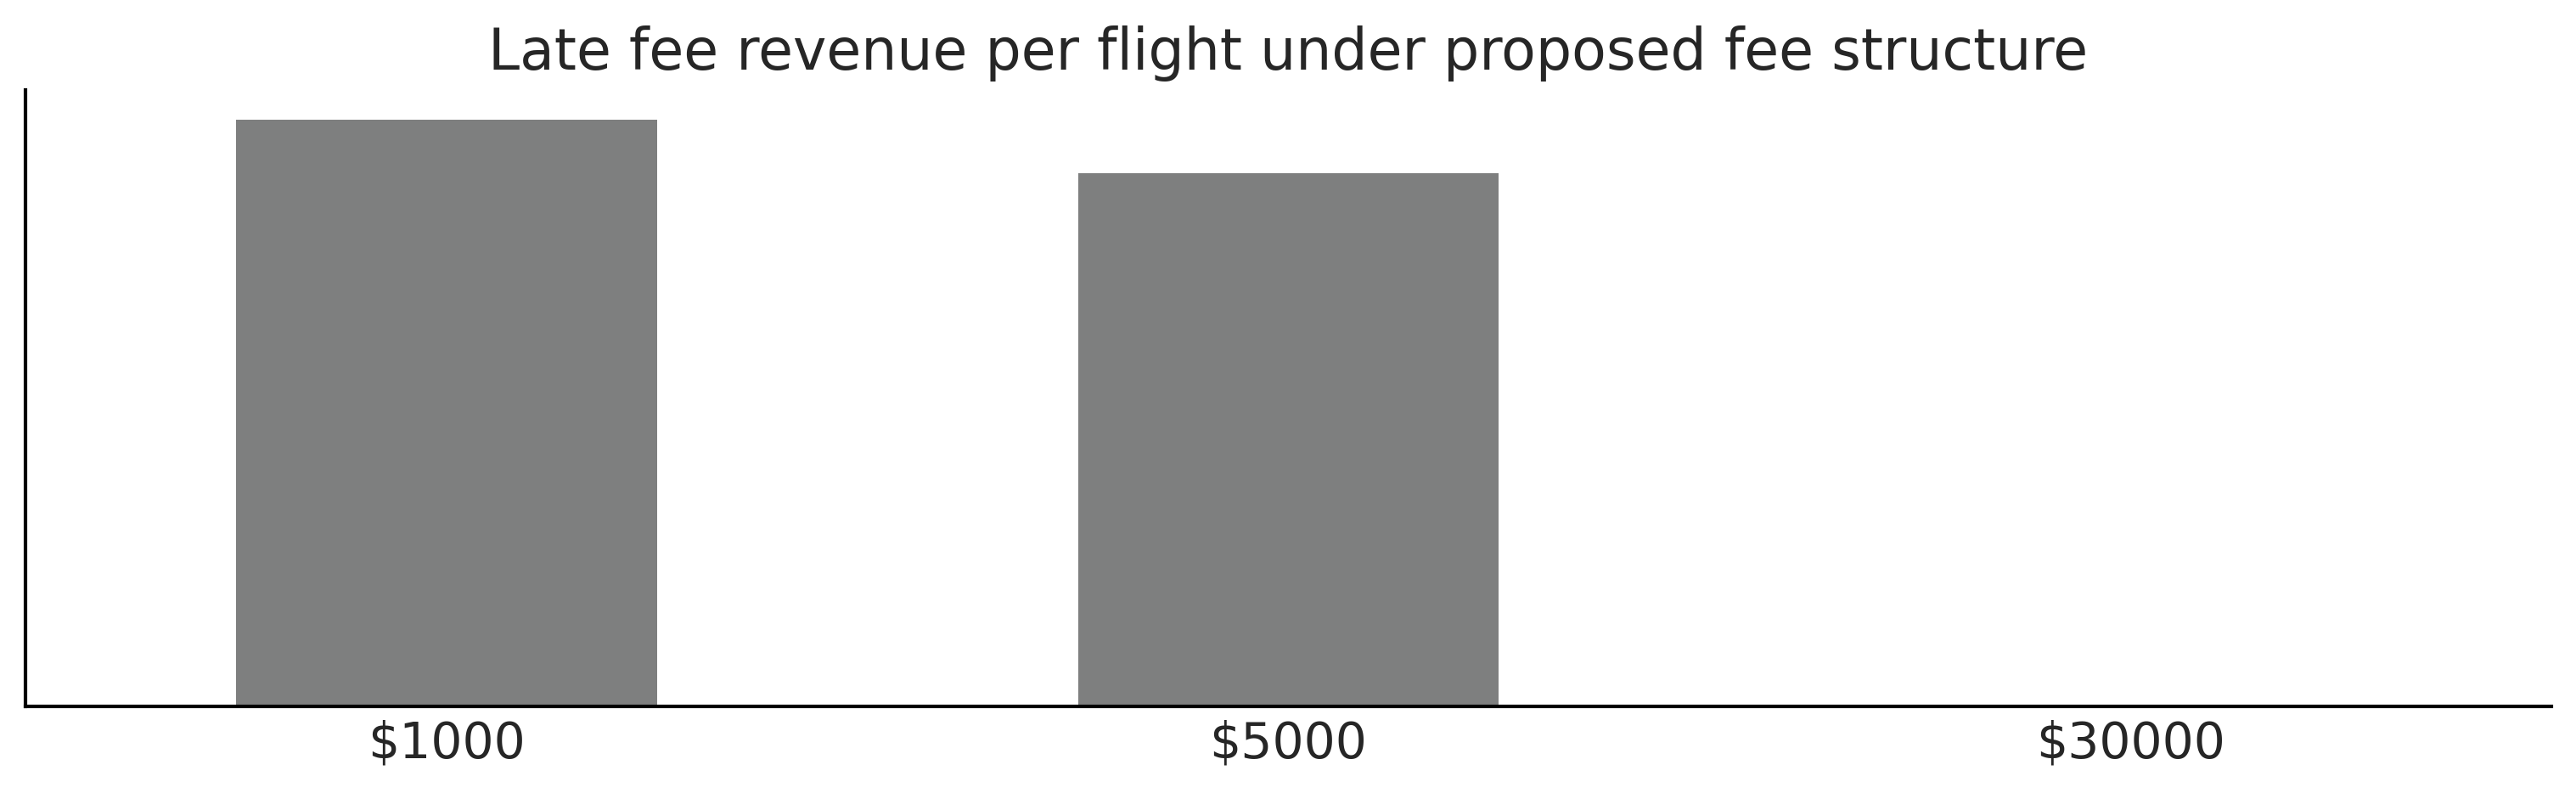

In [32]:
fig, ax = plt.subplots(figsize=(10, 3))

counts = pd.Series(revenue_per_flight_proposed.flatten()).value_counts()
counts.index = counts.index.astype(int)

counts.plot(kind="bar", ax=ax, color="C2")
ax.set_title("Late fee revenue per flight under proposed fee structure")
ax.set_yticks([]);
ax.tick_params(axis='x', labelrotation = 0)
ax.set_xticklabels([f"${i}" for i in counts.index])

plt.savefig("img/chp09/late_fee_proposed_structure_hist.png");

(section_sharing_results)=

## 9.10. Sharing the Results With a Particular Audience

One of the most important steps in the Bayesian workflow is to
communicate your results to others. Throwing numbers and graphs on
paper, or on screens, does nothing. The conclusion portion of inference
only matters when it changes or informs a decision, whether indirectly
or directly. This will require some preparation, the amount of effort
required should not be underestimated. In some situations this step
takes more time than all the previous ones combined. There is no specific
formulation here, what needs to be done depends heavily on the specific
situation and audience, but we will cover the concepts in a high level
to survey the landscape.

(reproducibility-of-analysis-workflow)=

### 9.10.1. Reproducibility of Analysis Workflow

Reproducibility of an analysis workflow is the notion that another
individual or group is able to go through all the steps and achieve the
same, or similar conclusions that were previously reported.
Reproducibility allows people, including yourself, to understand what
work was performed, what assumptions were made, and why that led to a
result. If reproducibility is neglected then it will be challenging or
impossible to understand the reasoning behind a conclusion, or extend
the result at a future date. Often times the outcome is at best wasted
resources recreating the same workflow steps and at worst invalidation
of the original conclusion and possibly also loss of reputation. The
ideal of reproducibility is complete reproducibility which means the
conclusion can be recreated automatically "from scratch\". We instead
will focus on analysis reproducibility, which means given a conclusion,
all the steps from the raw data through the Bayesian workflow, to the
final result are reproducible. Analysis reproducibility is comprised of
four main pillars which we will detail in turn

-   Management of the source data

-   Modeling and analysis code

-   Compute environment specification

-   Documentation

When performing an analysis it is important to note or preserve the raw
data that serves as the basis for the analysis. This is why you will
tend to see the same datasets, such as Palmer Penguins, Radon, and Eight
Schools, over and over again. The data is well understood and commonly
available which make it a simple reference for those looking to share
methods. The specific methods in which specific data is tagged,
recognized, stored, and accessed will differ per situation, size,
organization, as well as ethical and legal considerations but is
important to note this. Some examples are including the data in code
version control or referencing a link to a dataset stored on a server.

The next is the modeling and analysis code, such as all the code seen
throughout this book. Ideally this code would be versioned with a
version control system, such as git, and stored in an accessible
location, such as an open source repository. We want to highlight that
version control is useful even if you are a solo practitioner and not
working in a group. Using version control will allow you to jump between
versions of your code, it enables you to test ideas easily, with less
risk of knowledge loss or losing results. This helps tremendously with
increasing iteration speed between steps in the workflow and comparing
results.

In computational statistics a key portion of any result is the computer
itself. While the mechanics of computation are largely unchanging, the
libraries that are used for computation change rapidly. As we have seen,
modern Bayesian methods rely at least on a PPL but that is just the tip
of the iceberg. The operating system version as well as the hundreds of
other software libraries that are used in conjunction all play a part in
providing a result. When environments cannot be replicated one possible
outcome is that code that used to work, now throws exceptions or errors and fails.
This outcome, while frustrating, is at least helpful in that the failure
state is obvious. An even more dangerous but subtle issue is that the
code still runs but the results are different. This can occur because
the libraries may change, or the algorithms themselves. For example, TFP may
change the number of tuning samples or PyMC3 may refactor the sampler
between one version and the next. No matter what the reason, even if the
data and analysis code is the same, the two alone are insufficient to
fully computationally reproduce an analysis without the full
specification of the compute environment. A common way to specify an
environment is through an explicit list of dependencies, commonly seen
in Python packages as *requirements.txt* or *environment.yml* files.
Another way is through compute environment virtualization, such as
virtual machines or containerization.

::: {admonition} Seeding pseudo random number generator

One challenge in creating
reproducible Bayesian workflow is the stochastic-ness in the pseudo
random number generator being used in the algorithm. In general, your
workflow should be robust so that changing the seed to the pseudo random
number generator does not change your conclusion, but there are
situations where you might want to fix the seed to get fully
reproducible results. This is tricky as fixing the seed alone does not
mean you will always get completely reproducible results, as the actual
pseudo random number generator used in different operating systems could
be different. If your inference algorithm and conclusion is sensitive to
the choice of seeds, it is usually a red flag of your workflow.
:::

With the data, code, and compute environment, the computer is able to
reproduce only a portion of the analysis. The last pillar,
documentation, is for the human to understand the analysis as well. As
we have seen through this book there are many choices that statistical
practitioners need to make throughout the modeling process, from choices
of priors, to filtering data, to model architecture. Over time it is
quite easy to forget why a certain choice was made which is why so many
tools exist solely to help the humans behind the keyboard. The simplest
is code documentation which is comments within the code. Another popular
method for applied scientists is the notebook format that mixes code
blocks, with documentation blocks containing text, code, and images. The
Jupyter notebooks used with this book are an example. For Bayesian
practitioners dedicated tools such as ArviZ exist to help make analysis
reproducible as well.

At this point it is worth restating the primary beneficiary in
reproducibility is yourself. Few things are worse than being asked to
extend an analysis, or discovering a bug, only to realize your code will
not run anymore. The secondary beneficiaries are your peers. Their
ability to reproduce your work is the most immersive way to share your
workflow and results. In short reproducible analyses both help you and
others build confidence in your prior results, and also help future
efforts extend the work.

(understanding-the-audience)=

### 9.10.2. Understanding the Audience

It is important to understand who your audience is and how to
communicate with them, both in terms of content and the way of delivery.
As you get to your final set of results you end up with many ideas,
visualizations, and results generated along the way, which were
necessary to achieve the result, but not of any interest otherwise.
Recalling our cooking analogy, a diner wants to be served a dish, but
does not want the dirty pans and food waste that was generated during
the process alongside it. The same idea holds with statistical analysis.
Take a moment to consider:

-   What does your audience want and not want?

-   In what ways can you deliver it?

-   How long do they have to consume it?

It takes concerted effort and thought to distill your results to the
most digestible version. This means reviewing the original questions and
motivation for the analysis, who wanted the results and why they wanted
it. It also means considering the background and aptitude of the
audience. For example, a more statistical audience may prefer to see
details about models and assumptions. A more domain-oriented audience
may still be interested in the assumptions in the model but mostly in
the context of the domain problem.

Think through presentation format, is it verbal or visual? If it is
visual will it be static, such as this book, or a pdf or paper, or in a
potentially dynamic format, like a webpage or video? And consider the
timing as well, does your audience have a couple moments to hear the
highlights, or is there a dedicated time slot solely focused on going
through the details? Answers to all these questions will inform what you
share, but also you share it

(numerical-summaries)=

#### 9.10.2.1. Numerical Summaries

Numerical summaries, as the name implies, are numbers that summarize
your results. In this book we have seen many, from means and medians
which summarize the position of a distribution, to variance or HDI which
summarize the dispersion, or PDFs which summarize probability. For
example {numref}`tab:penguin_mass_parameters_bayesian_estimates`,
which summarized penguin mass. Numerical summaries confer a great
advantage as they compress a great deal of information into a small
representation, can be easily remembered, easily compared, and presented
in many formats. They are particularly effective in verbal conversations
as no other aides are required to disseminate them. In business
conversations reward functions, as discussed in Section {ref}`reward_functions`,
can capture the full uncertainty of your analysis into a single number
and can also be framed in the most universal business language, money.

Unfortunately numerical summaries may obscure the nuances of
distributions and can be misunderstood. Many people when hearing a mean
value tend to overly expect that value, even though in reality the
probability of the mean outcome may be rare. To aid with this sharing a
set of numerical summaries at once can help the audience understand
various aspects of a distribution, for example a maximumlLikelihood to
get a sense of the mode and HDI to get a sense of dispersion. However,
sharing too many numerical summaries becomes harmful. It is both
difficult to a recite table of numbers and hard for your audience to
retain all the information if many numbers are shared at once.

(static-visual-aids)=

### 9.10.3. Static Visual Aids

There is an adage that says a picture is worth a 1000 words. This is
particularly true with Bayesian statistics where posterior plots convey
a level of detail that is not as easily described with words. ArviZ
comes prepackaged with many of the common visualizations such as
posterior plots. However, we also suggest making bespoke graphics as
well. Examples in this text include posterior estimates such as {numref}`fig:bart_bikes` 
which shows both the observed data,
mean trend, and uncertainty for all hours a day. Static visual aids are
like numerical summaries, they are also fairly easily shared these days.
With the widespread use of laptops and phones, as well as internet
connected devices, sharing a picture has become easier than before.
However, the downside is they do require paper or a screen to share, and
need to be either prepped or quickly found in the event they are needed.
Another risk is they can communicate too much to your audience, who


(animation)=

#### 9.10.3.1. Animation

Anyone who has seen the difference between a picture and film, even a
silent film, understands how powerful motion can be in communication.
Often times ideas that are are very easily understood when animated than
in other formats [^3], such as MCMC sampling [^4]. Animations can now be
generated in many visualization packages, including Matplotlib, which
ArviZ utilizes for animated Posterior Predictive Checks. Notable
examples of animation used in uncertainty communication are the New York
Times Election Needle [^5], which used a shaking needle gauge to
highlight the uncertainty in the estimation of which candidate would ultimately win.
Another election example is Matthew Kay's Presidential
Plinko [^6]. Both of these visualizations used motion to show the
estimated outcome of various United States election results and how it
was generated. Most importantly both used animation give a sense of the
uncertainty, from the shaking needle in the New York Times
visualization, or the randomness of the Plinko drops in Matthew Kay's
example.

Animations are able to display many images to show a changing state, and
therefore convey a sense of motion, progression, and iteration. As with
static images, widespread use of digital screens means they can be
viewed more easily, but they require more time from the viewer who has
to pause and watch the full animation. They also require more work from
a developer, as they are more challenging to generate and share than a
simple picture.

[^3]: See <https://bost.ocks.org/mike/algorithms/>

[^4]: See
    <https://elevanth.org/blog/2017/11/28/build-a-better-markov-chain/>

[^5]: See
    <https://www.nytimes.com/interactive/2020/11/03/us/elections/forecast-president.html>

[^6]: See <http://presidential-plinko.com/>

(interactive-aids)=

#### 9.10.3.2. Interactive Aids

Interactive aids give the viewers control over what is being displayed.
In both static visualization and animations the audience is being told a
story they have no control over. Interactive aids flip the script, the
user is able to create their own story. A simple example may include a
slider that changes what is being displayed, such as limits of the axes
or the opacity of data points. It may also include a tooltip which shows
the user a value at a particular point. The user may also be able to
control the computation. For example in our posterior predictive
predictions of penguins which picked the mean flipper length and plotted
the results of {numref}`fig:Flipper_length_mass_posterior_predictive`.
Different people may be interested in the posterior predictive
distribution at a different value hence the interactivity. Examples
include visualizations of various MCMC techniques [^7] where allowing
the user to select different samplers, distributions, and parameters
allows the user to make the specific comparisons they would like.

Similar to static plots and animations many software libraries support
animation for instance, Matplotlib or Bokeh, another Python
visualization library which is explicitly designed for this type of
interaction. The downside of interactivity is that they typically
require a live computing environment and software deployment of some
sort. It is not as easy as sharing a static image or a video.

[^7]: <https://chi-feng.github.io/mcmc-demo/app.html>

(reproducible-computing-environments)=

### 9.10.4. Reproducible Computing Environments

Thinking back to reproducibility above, the gold standard of sharing
results is a fully reproducible computation environment that contains
everything needed to replicate your result. This historically was a high
hurdle, it took time and expertise, to setup a local computation
environment on one's own device, but is becoming much easier through
virtualization technologies like containerization. These days the
computation environment and code can be packaged and easily distributed
over the internet. With projects like Binder, make it literally one
click for a colleague to gain access to a bespoke environment in their
browser, no local install needed. Most people will only want the
results, not all the raw ingredients per say. But in the situations
where someone absolutely needs to run the code, for example a tutorial
or an in depth review, being able to share a live environment easily is
quite helpful.

(applied-example-presenting-the-flight-delay-model-and-conclusions)=

### 9.10.5. Applied Example: Presenting the Flight Delay Model and Conclusions

Confident with your rigor in model building, inference run, and cost
function correctness you now need to communicate the results to other in
your organization, both to justify your analysis approach to your data
peers and to aid your boss's decision between the current fee structure,
and the proposed fee structure. You realize you have two different
groups of audiences and prepare content differently for each one.

Before approaching your boss you need to complete a peer review with
your peers. As your peers are statistically and computation savvy you
provide them the Jupyter Notebook of your analysis that mixes narration,
code, and results. This notebook includes all the previous models,
assumptions, and plots, that you used to come to the recommendation for
your boss. Since the notebook has all the details and is reproducible
your colleagues are able to confidently assess your work is correct.
Some of your colleagues ask if they can run the model with different
priors to check for prior sensitivity. You provide the Dockerfile[^8],
which fully specifies the environment. With that they are able to run
the Jupyter notebook and recreate portions of your workflow.

Focusing now on your initial task of informing your boss you start
thinking through strategies of how to communicate to her. You know that
you have at most 30 minutes and it will be in her office. You will have
your laptop to show visual aids but you know your boss also needs to be
able to communicate this idea to her peers in situations where she will
not have visual aids. You also know your boss might want to test
different fee structures to understand where she can safely negotiate.
In other words she wants to see the effect of different reward
functions. You set up a simple notebook that takes the reward function
as an input and produces the revenue histogram and table. You set a
meeting with your boss and quickly explain "I spent some time using past
late flight delays to create a model of what future flights delays could
look like. Using the model I estimate in the current fee structure we
will make 3930 dollars per late flight on average, in the airline's
proposed fee structure we will make 2921 dollars per late flight on
average\". You show your boss the bottom plot
{numref}`fig:Delays_Model_Posterior_Predictive`, explaining this is the
distribution of late flights both expected and modeled, and
{numref}`fig:Late_fee_current_structure_hist` showing the revenue that
is projected to be generated in the future. You then show your boss
{numref}`table:late_flight_revenue` showing the expected revenue
under the new paradigm. You chose a table over a figure because the
proportion of flights in the 100+ minute lateness category was not
evident in a plot. You use the table to explain that there are so few
flights that are likely to be over 100 minutes late, that from a revenue
perspective that category is negligible in your simulations. You
recommend that your boss either reject the proposal, or that she
negotiates a higher late fees for delays that lie within the 0 to 100
minute categories. Your boss then asks if you can test a couple
different fee structures of her choosing so she can see the effect. With
your boss's understanding the goal of inference has been achieved, your
boss has all the information needed to make an informed decision in her
negotiation.


```{list-table}  Percentages of expected revenue from each fee category. There are so few late flights in the \$30000 fee category that it is essentially negligible.
:name: table:late_flight_revenue
* - **Late Fee**
  - **Revenue**
* - \$1000
  - 52%
* - \$5000
  - 47%
* - \$30000
  - .03%
```

[^8]: Docker is one method to create fully reproducible environments
    that has become quite popular

In [33]:
counts

1000     1106217
5000     1004295
30000        540
Name: count, dtype: int64

In [34]:
counts/counts.sum()*100

1000     52.40122
5000     47.57320
30000     0.02558
Name: count, dtype: float64

(applied_experimental_example)=

## 9.11. Experimental Example: Comparing Between Two Groups

For our second applied example will show the use of Bayesian statistics
in a more experimental setting where the difference between two groups
is of interest. Before addressing the statistics we will explain the
motivation.

When mechanical engineers are designing products, a primary
consideration is the properties of the material that will be used. After
all, no one wants their airplane to fall apart midflight. Mechanical
engineers have reference books of weight, strength, and stiffness for
materials such as ceramics, metals, woods which have existed for eons.
More recently plastics and fiber reinforced composites have become
available and more commonly used. Fiber reinforced composites are often
made from a combination of plastic and woven cloth which gives them
unique properties.

To quantify the strength properties of materials a physical test
mechanical engineers run a procedure called a tensile test, where a
specimen of material is held in two clamps and a tensile test machine
pulls on the specimen until it breaks. Many data points and physical
characteristics can be estimated from this one test. In this experiment
the focus was on ultimate strength, or in other words, the maximum load
before total material failure. As part of a research project [^9] one of
the authors manufactured 2 sets, of 8 samples each, that were identical
in every way except for the weave of the reinforcing fibers. In one the
fibers were flat on top of each other referred to as unidirectional
weave. In the other the fibers were woven together into an interlocking
pattern referred to as a bidirectional weave.

A series of tensile tests were run independently on each sample and the
results were recorded in pound-force [^10]. Customary to mechanical
engineering the force is divided by area to quantify force per unit
area, in this case pound force per square inch. For example, the first
bidirectional specimen failed at 3774 lbf (1532 kg) at a cross section
area of .504 inches (12.8 mm) by .057 inches (1.27 mm), yielding an ultimate
strength of 131.393 ksi (kilopound per square inch). For reference this
means a coupon with a cross sectional area of 1/3 a USB A connector is
theoretically capable of lifting the weight of a small car [^11].


|  **Bidirectional Ultimate Strength (ksi)** |  **Unidirectional Ultimate Strength (ksi)** |
|  :---------------------------------------- | ------------------------------------------: |
|                   131.394                  |                   127.839                   |
|                   125.503                  |                    132.76                   |
|                   112.323                  |                   133.662                   |
|                   116.288                  |                   136.401                   |
|                   122.13                   |                   138.242                   |
|                   107.711                  |                   138.507                   |
|                   129.246                  |                   138.988                   |
|                   124.756                  |                   139.441                   |


In the original experiment a frequentist hypothesis test was performed
which concluded in the rejection the null hypothesis that the ultimate
tensile were equivalent. This type of statistical test however, could
not characterize either the distribution of ultimate strengths for each
material independently or the magnitude of difference in strengths.
While this represents an interesting research result, it yields a
non-useful practical result, as engineers who intend to choose one
material over another in a practical setting need to know *how* much
"better\" one material is than another, not just that there is a
significant result. While additional statistical tests could be
performed to answer these questions, in this text we will focus on how
we can answer all these questions using a single Bayesian model well as
extend the results further.

Let us define a model for the unidirectional specimens in Code Block
[uni_model](uni_model). The prior parameters have already
been assessed using domain knowledge. In this case the prior knowledge
comes from the reported strength properties of other composite specimens
of similar type. This is a great case where the knowledge from other
experimental data and empirical evidence can help reduce the amount of
data needed to reach conclusions. Something especially important when
each data point requires a great deal of time and cost to obtain, like
in this experiment.

```{code-block} python
:name: uni_model
:caption: uni_model

with pm.Model() as unidirectional_model:
    sd = pm.HalfStudentT("sd_uni", 20)
    mu = pm.Normal("mu_uni", 120, 30)
    
    uni_ksi = pm.Normal("uni_ksi", mu=mu, sigma=sd, 
                        observed=unidirectional)
    
    uni_trace = pm.sample(draws=5000)
```

[^9]: Much gratitude to Dr. Mehrdad Haghi and Dr. Winny Dong for funding
    and facilitating this research

[^10]: A recordings of the tests are available
    <https://www.youtube.com/watch?v=u_XDUWgzs_Y>

[^11]: This is in an ideal situation. Factors other than ultimate
    strength can limit the true load bearing capacity in real world
    situations.

In [35]:
composites_df = pd.read_csv("../data/CompositeTensileTest.csv")

In [36]:
unidirectional = composites_df["Unidirectional Ultimate Strength (ksi)"].values
bidirectional = composites_df["Bidirectional Ultimate Strength (ksi)"].values

In [37]:
with pm.Model() as unidirectional_model:
    sd = pm.HalfStudentT("sd_uni", 20)
    mu = pm.Normal("mu_uni", 120, 30)
    
    uni_ksi = pm.Normal("uni_ksi", mu=mu, sigma=sd, observed=unidirectional)
    
    uni_data = pm.sample(draws=5000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_uni, mu_uni]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


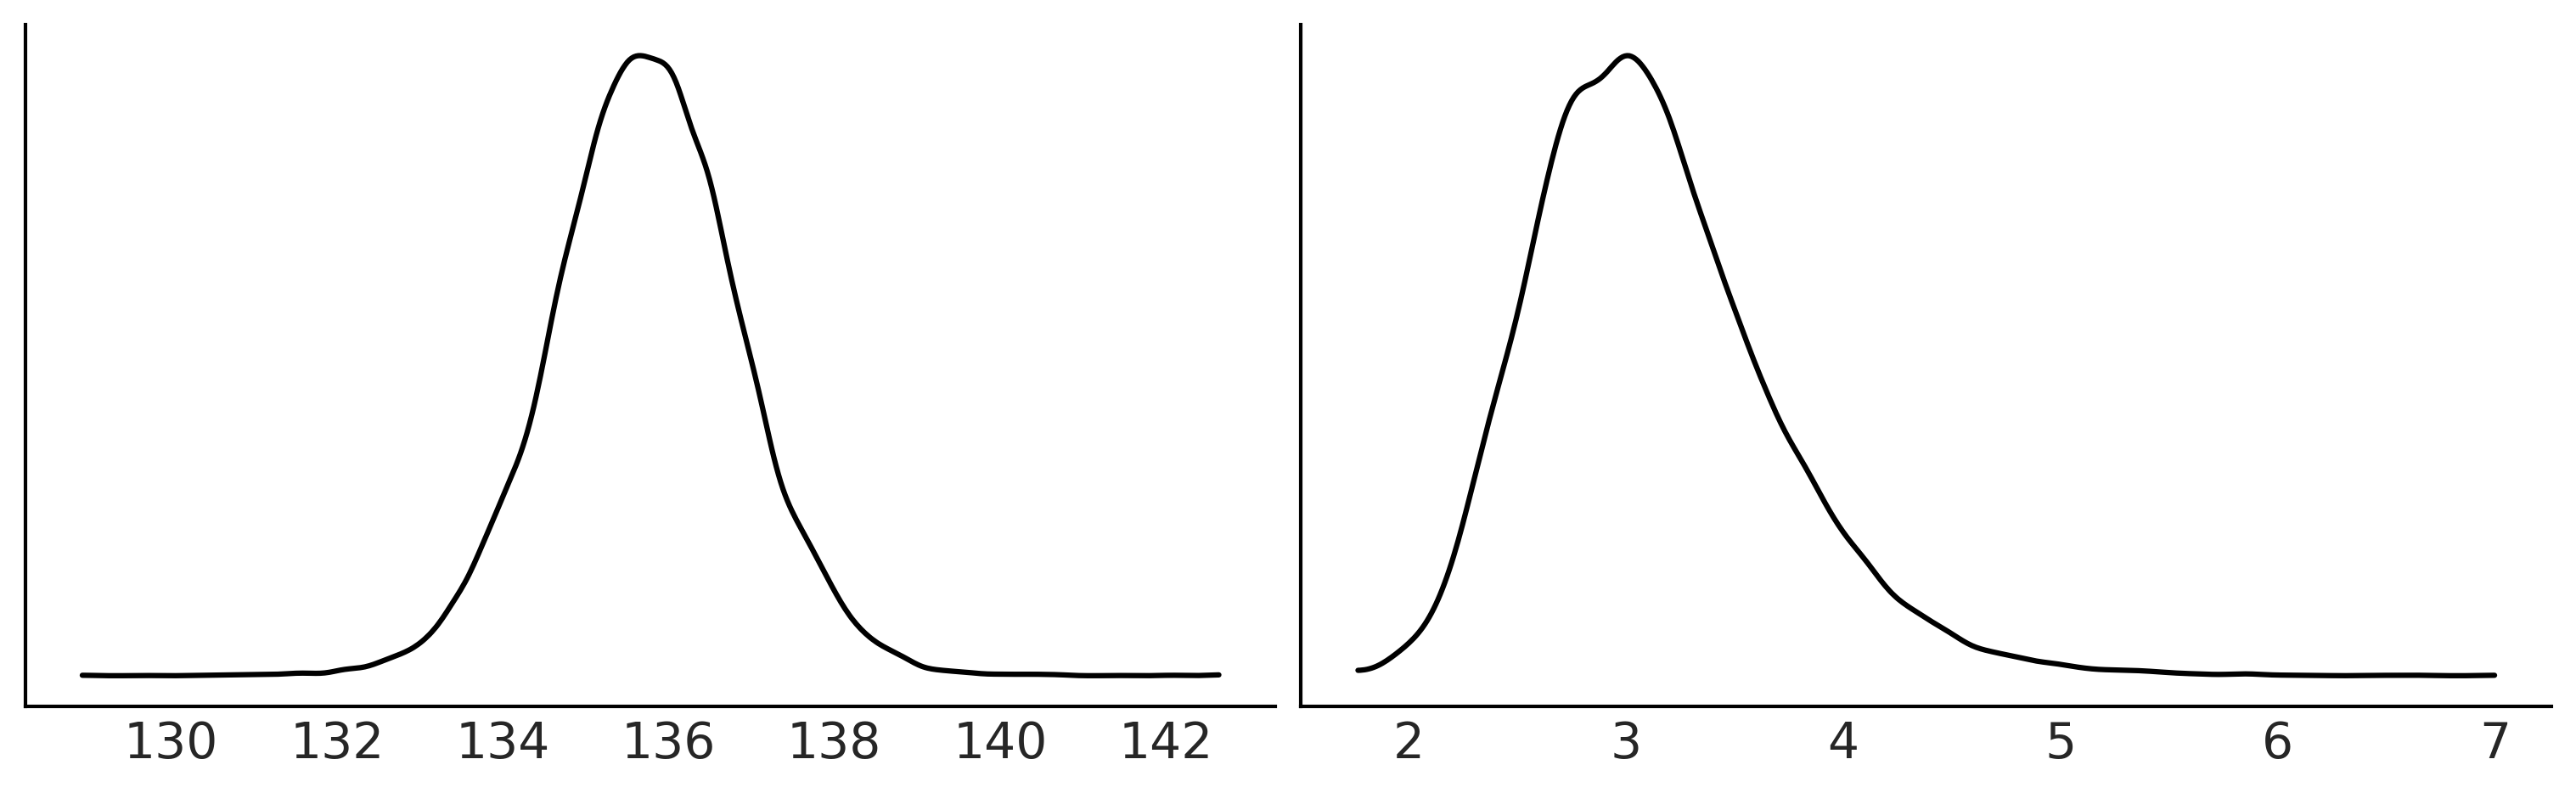

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
az.plot_dist(uni_data.posterior["mu_uni"], ax=axes[0]);
az.plot_dist(uni_data.posterior["sd_uni"], ax=axes[1]);
axes[0].set_yticks([])
axes[1].set_yticks([])
fig.savefig("img/chp09/kde_uni.png")

We plot the posterior results in {numref}`fig:uni_sd_posterior_plot`. As
seen many times with the Bayesian modeling approach we get distribution
estimates for both the mean ultimate strength and the standard deviation
parameters, which is very helpful in understanding how reliable this
particular material is.

```python
az.plot_posterior(uni_data)
```

```{figure} figures/Posterior_Uni.png
:name: fig:uni_sd_posterior_plot
:width: 8.00in
Posterior Plot of all parameters with 94% HDI and point statistic
```

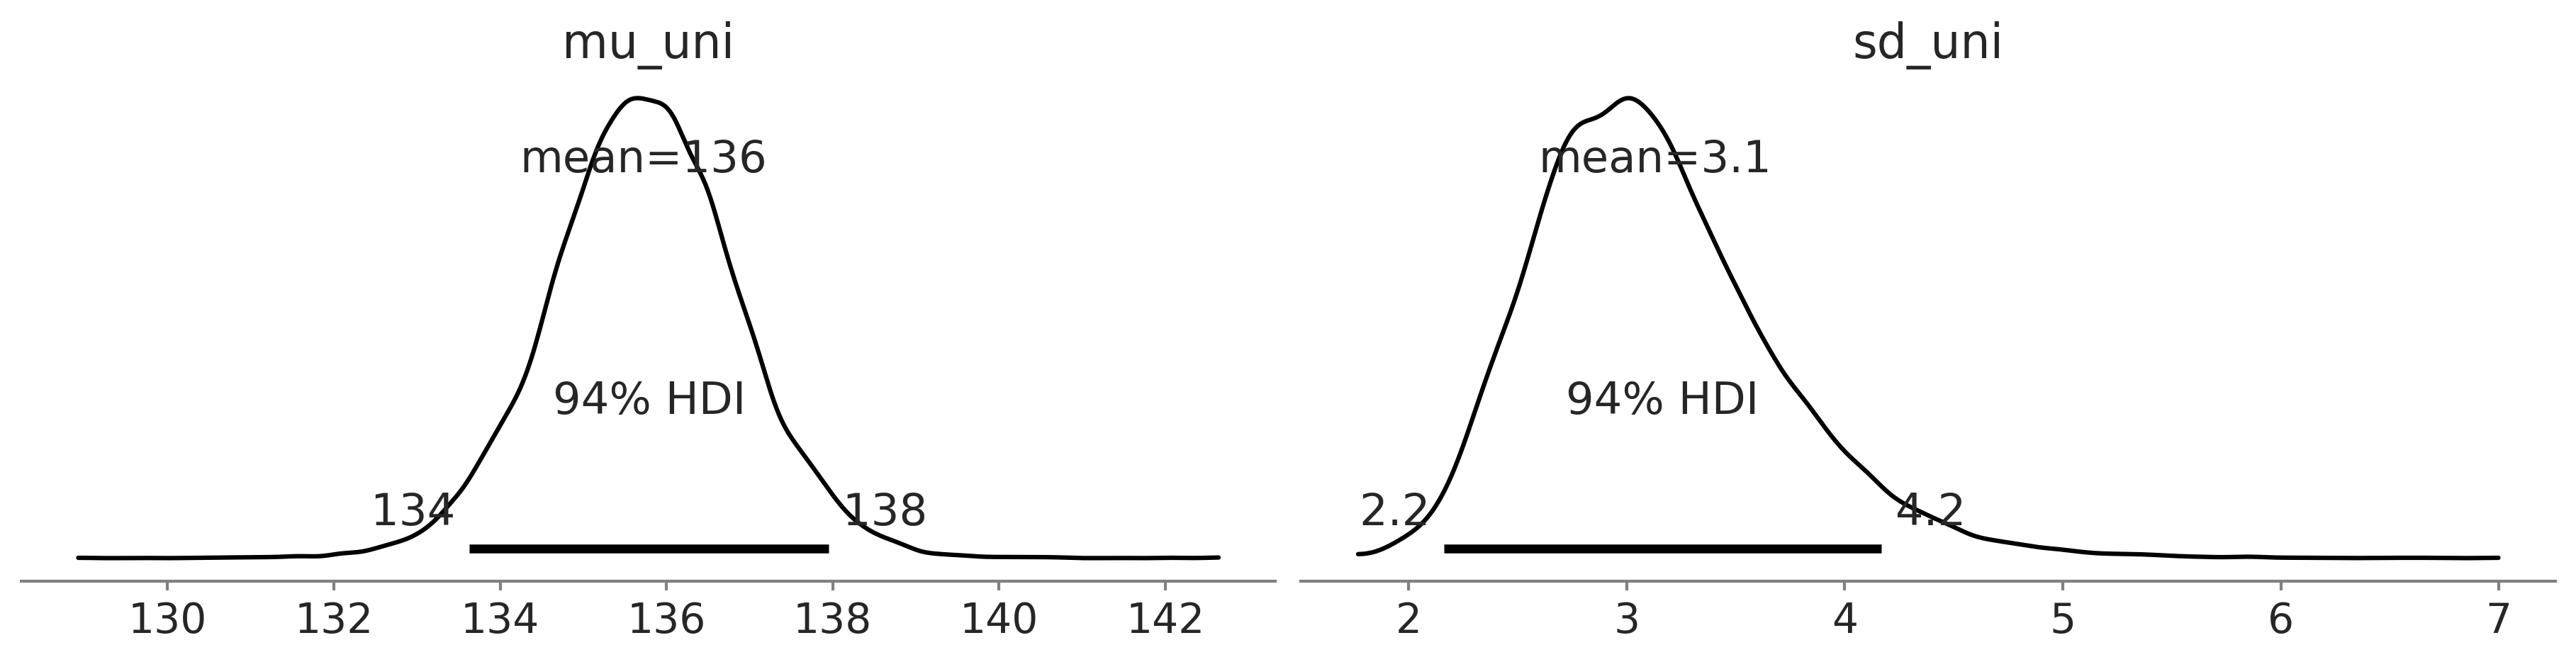

In [39]:
az.plot_posterior(uni_data, figsize=(12, 3));
plt.savefig("img/chp09/posterior_uni.png")

Our research question however, was about the differences in the ultimate
strength between unidirectional and bidirectional composites. While we
could run another model for the bidirectional specimens and compare
estimates, a more convenient option would be to compare both in a single
model., We can leverage John Kruschke's model framework as defined in
"Bayesian estimation supersedes the t-test\" {cite:p}`kruschke_2013` to obtain
this "one and done\" comparison as shown in Code Block
[comparison_model](comparison_model).

```{code-block} python
:name: comparison_model
:caption: comparison_model

μ_m = 120
μ_s = 30

σ_low = 1
σ_high = 100

with pm.Model() as model:
    uni_mean = pm.Normal("uni_mean", mu=μ_m, sigma=μ_s)
    bi_mean = pm.Normal("bi_mean", mu=μ_m, sigma=μ_s)
    
    uni_std = pm.Uniform("uni_std", lower=σ_low, upper=σ_high)
    bi_std = pm.Uniform("bi_std", lower=σ_low, upper=σ_high)
    
    ν = pm.Exponential("ν_minus_one", 1/29.) + 1
    
    λ1 = uni_std**-2
    λ2 = bi_std**-2

    group1 = pm.StudentT("uni", nu=ν, mu=uni_mean, lam=λ1,
        observed=unidirectional)
    group2 = pm.StudentT("bi", nu=ν, mu=bi_mean, lam=λ2, 
        observed=bidirectional)
    
    diff_of_means = pm.Deterministic("difference of means", 
                                     uni_mean - bi_mean)
    diff_of_stds = pm.Deterministic("difference of stds",
                                    uni_std - bi_std)
    pooled_std = ((uni_std**2 + bi_std**2) / 2)**0.5
    effect_size = pm.Deterministic("effect size",
                                   diff_of_means / pooled_std)
    
    t_trace = pm.sample(draws=10000)

compare_data = az.from_pymc3(t_trace)
```

In [40]:
μ_m = 120
μ_s = 30

σ_low = 10
σ_high = 30

with pm.Model() as model:
    uni_mean = pm.Normal('uni_mean', mu=μ_m, sigma=μ_s)
    bi_mean = pm.Normal('bi_mean', mu=μ_m, sigma=μ_s)
    
    uni_std = pm.Uniform('uni_std', lower=σ_low, upper=σ_high)
    bi_std = pm.Uniform('bi_std', lower=σ_low, upper=σ_high)
    
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1
    
    λ1 = uni_std**-2
    λ2 = bi_std**-2

    group1 = pm.StudentT('uni', nu=ν, mu=uni_mean, lam=λ1, observed=unidirectional)
    group2 = pm.StudentT('bi', nu=ν, mu=bi_mean, lam=λ2, observed=bidirectional)
    
    diff_of_means = pm.Deterministic('Difference of Means', uni_mean - bi_mean)
    diff_of_stds = pm.Deterministic('Difference of Stds', uni_std - bi_std)
    effect_size = pm.Deterministic('Effect Size',
                                   diff_of_means / np.sqrt((uni_std**2 + bi_std**2) / 2))
    
    t_idata = pm.sample(draws=10000)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [uni_mean, bi_mean, uni_std, bi_std, ν_minus_one]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 7 seconds.


After fitting the model we can visualize the difference in means using a
Forest Plot in {numref}`fig:composite_forest_plot`, there does not seem
to be much overlap between the mean of two types of samples, suggesting
their ultimate strength is indeed different, with the unidirectional
being stronger and perhaps even being a little bit more reliable.

    az.plot_forest(t_trace, var_names=["uni_mean","bi_mean"])

```{figure} figures/Posterior_Forest_Plot.png
:name: fig:composite_forest_plot
:width: 8.00in
Forest plot of the means of each group. The 94% HDI is separated
indicating a difference in the means.
```

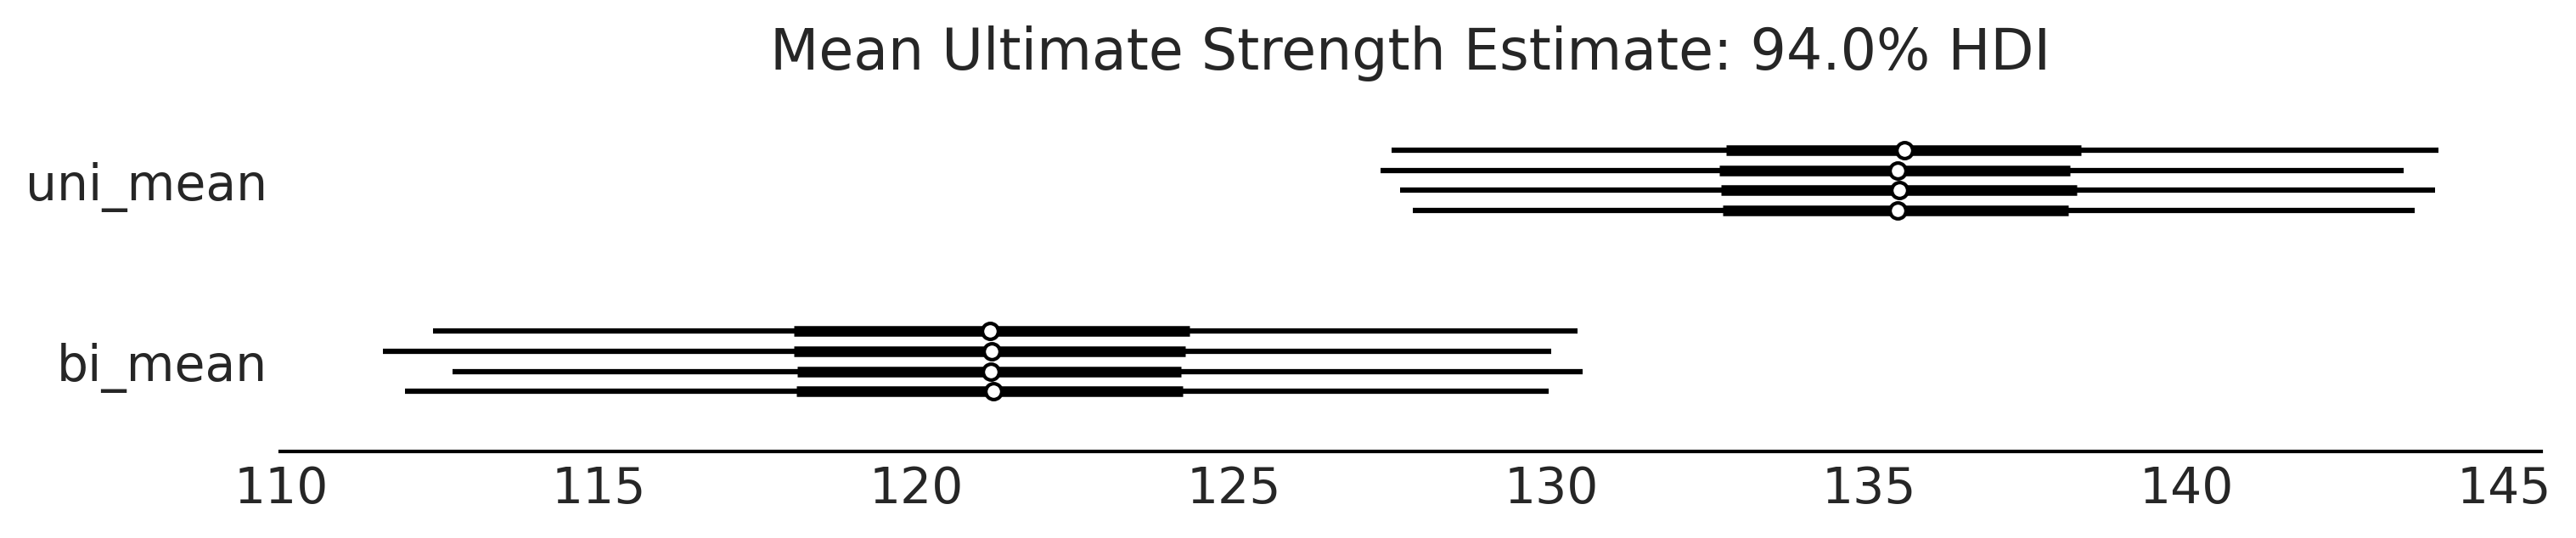

In [41]:
axes = az.plot_forest(t_idata, var_names=['uni_mean','bi_mean'], figsize=(10, 2));
axes[0].set_title("Mean Ultimate Strength Estimate: 94.0% HDI")
plt.savefig("img/chp09/Posterior_Forest_Plot.png")

There is an additional benefit to both Kruschke's formulation, and a
trick in our PPL. We can have the model automatically calculate the
difference directly, in this case one of them being posterior
distribution of the difference of means.

```python
az.plot_posterior(trace, 
                  var_names=["difference of means","effectsize"],
                  hdi_prob=.95, ref_val=0)
```

```{figure} figures/Composite_Difference_Of_Means.png
:name: fig:composite_difference_of_means
:width: 8.00in
Posterior Plot of difference of means and effect size including
reference value at 0. In both the plots a value of 0 is relatively
unlikely indicating there is both an effect and a difference.
```

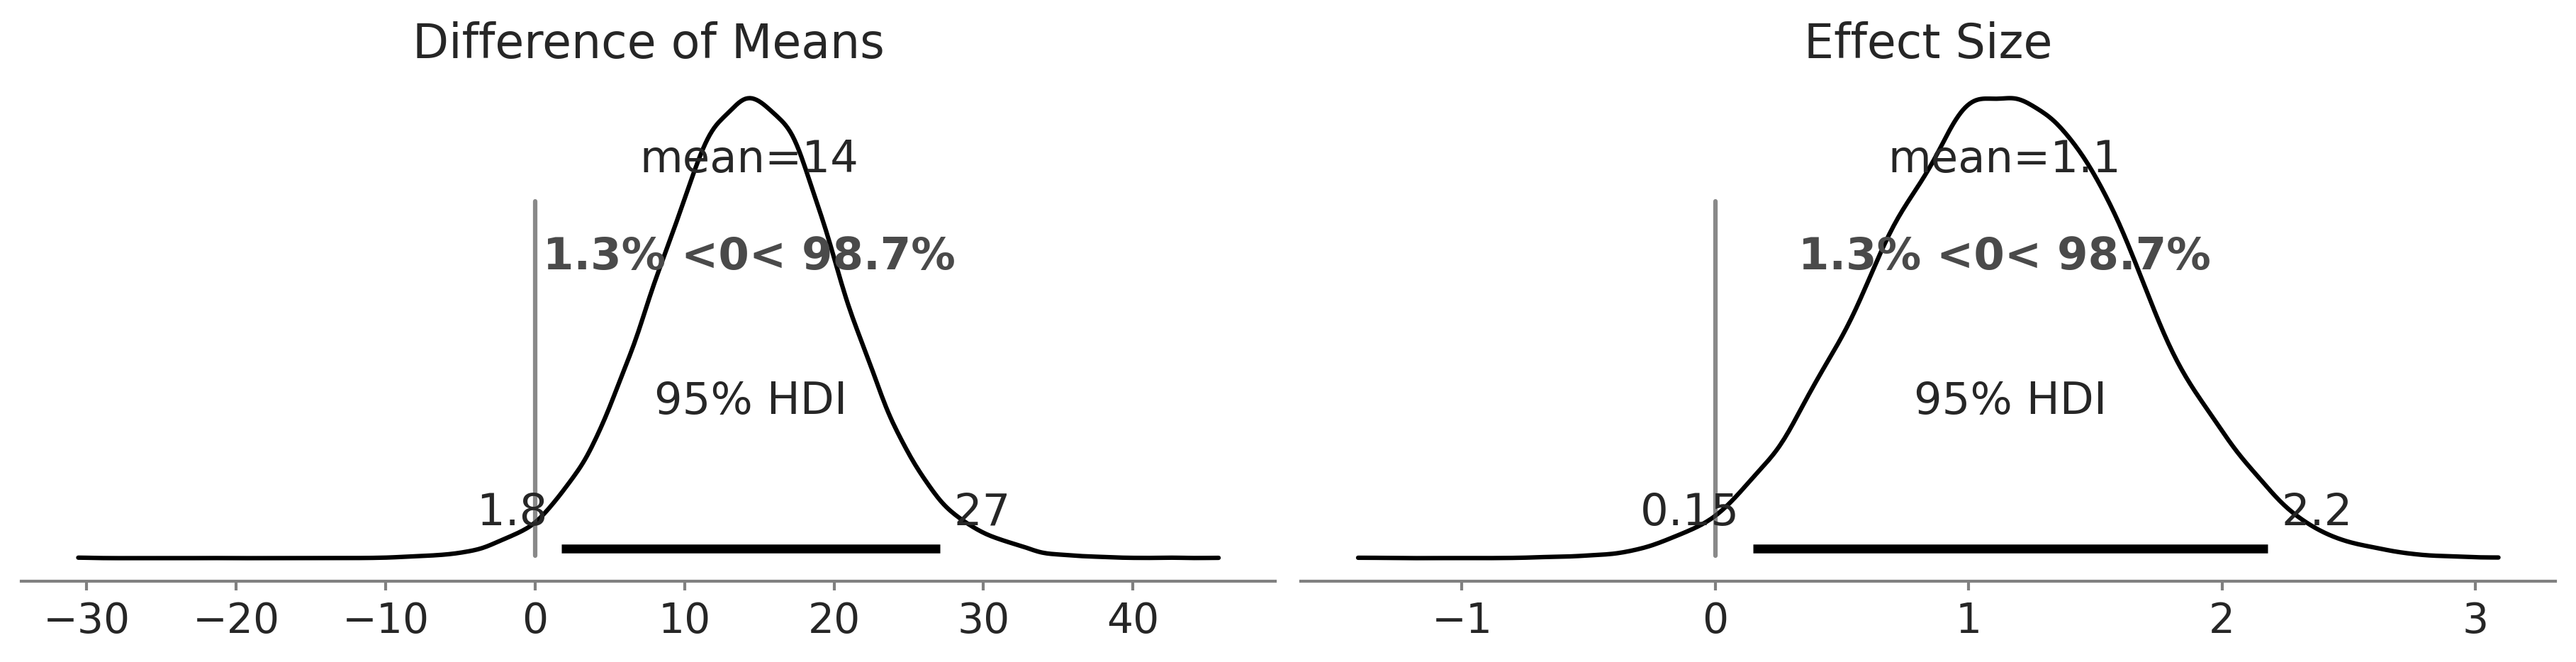

In [42]:
az.plot_posterior(t_idata, var_names=['Difference of Means','Effect Size'], hdi_prob=.95, ref_val=0, figsize=(12, 3));
plt.savefig("img/chp09/composite_difference_of_means.png")

We can compare the numerical summaries for each parameter as well.

```python
az.summary(t_trace, kind="stats")
```


|                                     |  **mean** |  **sd** |  **hpd_3%** | **hpd_97%** |
| :---------------------------------- | ----------| ------- | ------------|-----------: |
|  **uni_mean**                       |  135.816  |  1.912  |   132.247   |    139.341  |
|  **bi_mean**                        |  121.307  |  3.777  |   114.108   |    128.431  |
|  **uni_std**                        |   4.801   |  1.859  |    2.161    |     8.133   |
| **bi_std**                          |   9.953   |  3.452  |    4.715    |    16.369   |
|  $\boldsymbol{\nu}$**\_minus_one**  |   33.196  |  30.085 |    0.005    |    87.806   |
|  **difference of means**            |   14.508  |  4.227  |    6.556    |    22.517   |
|  **difference of stds**             |   -5.152  |  3.904  |   -13.145   |     1.550   |
|  **effect size**                    |   1.964   |  0.727  |    0.615    |     3.346   |


From these numerical summary and posterior plot we can be more sure
there is a difference in the mean strength of the two composites which
helps when making a selection between the two material types. We also
have obtained the specific estimated values of strength, with their
dispersion, helping an engineer understand where and how the material
can be used, safely, in real world applications. It is quite convenient
that one model can help us reach multiple conclusions.

In [43]:
az.summary(t_idata, kind="stats")

,mean,sd,hdi_3%,hdi_97%
Difference of Means,14.320,6.417,2.135,26.345
Difference of Stds,-1.031,4.065,-9.660,6.618
Effect Size,1.141,0.522,0.146,2.105
bi_mean,121.152,4.812,111.945,130.074
bi_std,13.241,3.211,10.000,19.245
uni_mean,135.472,4.287,127.470,143.645
uni_std,12.210,2.493,10.000,16.633
ν_minus_one,36.397,30.384,0.649,91.714


(exercises9)=

## 9.12. Exercises

**9E1.** What kind of data collection scheme would be most
appropriate for these situations scenarios. Justify your choices by
asking questions such as "How important is it that the information is
reliable?\" or "Can we collect the data in a reason time?\" Explain how
you would collect the data

1.  A medical trial for for a new drug treatment for cancer patients

2.  An estimate of the most popular ice cream flavors for a local
    newspaper article

3.  An estimate of which parts needed for a factory have the longest
    delivery lead times

**9E2.** What kind likelihood is suited for these types of
data? Justify your choice. What other information would be useful to
pick a likelihood?

1.  Count of customers that visit a shop each day

2.  Proportion of parts that fail in a high volume manufacturing line

3.  Weekly revenue of a restaurant

**9E3.** For our airline model provide a justification, or
lack thereof, for each of these priors of the mean of a Gumbel
likelihood, using your domain knowledge and a prior predictive check. Do
these seem reasonable to use in a model? Why or why not?

1.  $\mathcal{U}(-200, 200)$

2.  $\mathcal{N}(10, .01)$

3.  $\text(Pois)(20)$

**9E4.** For each of the priors in the exercise above perform
an inference run using the Gumbel model in Code Block
[airline_model_definition](airline_model_definition)

1.  Are any errors raised by the sampler?

2.  For the completed inference run generate post sampling diagnostics
    such as autocorrelation plots. What are the results? Would you
    consider the run to be a successful inference run?

**9E5.** For our airline delays model we initially included
arrivals from the MSP and DTW airports. We are now asked to include
another arrival airport, ORD, into the analysis. Which steps of the
Bayesian Workflow do we need to reconsider? Why is that the case? What
if instead we are asked to include SNA? What steps would we need to
reconsider?

**9E6.** In Chapter [6](chap4) we forecasted the
CO~2~ concentration. Using the figures and models in the chapter what
conclusions can we reach about CO~2~? Communicate your understanding of
projected CO~2~ levels, including an explanation of the uncertainty, in
the following ways. Be sure to include specific numbers. You may need to
run the examples to obtain them. Justify which model you chose and why

1.  A 1 minute verbal explanation without visual aid to data scientist
    colleague

2.  A 3 slide presentation for an non-statistician executive.

3.  Use a Jupyter notebook for a software engineering colleague who
    wants to productionize the model as well.

4.  Write a half page document for a general internet audience. Be sure
    to include at least one figure.

**9E7.** As the airport statistician your boss asks you to
rerun the fee revenue analysis with a different cost function than the
one specified in Code Block
[current_revenue](current_revenue). She asks that any
minute delay that is even costs 1.5 dollars per minute of delay, any
that minute delay that is odd costs 1 dollar a minute of delay. What
will the average revenue per late flight be the airport be with this fee
model?

**9M8.** Read the workflow article and paper from
Betancourt{cite:p}`betancourt_2020_worfklow` and Gelman{cite:p}`Gelman2020`. From each
list a step which is the same? Which steps are different? Explain why
these examples workflows may be different. Do all practitioners follow
the same workflow? Why would they differ if not?

**9M9.** In our bike rental model from Code Block
[splines](splines) we used splines to estimate bike
rentals per hour. The bike rental company wants to know how much money
they will make from rentals. Assume each rental costs 3 dollars. Now
assume that the rental company is proposing that from the hours of 0 to
5 bike rentals are reduced to 1.5 dollars, but it is projected rentals
will increase 20% due to the reduced cost. What is the expected revenue
per hour?

Write a reward function specifically to estimate both situations above.

1.  What is the mean projected revenue per day? What would be reasonable
    upper and lower estimates?

2.  Does the estimated mean and revenue seem reasonable? Note any issues
    you see and explain you may fix them? (Don't actually make any
    changes)

3.  Now assume that the rental company is proposing that from the hours
    of 0 to 5 bike rentals are reduced to 1.5 dollars, but it is
    projected rentals will increase 20% due to the reduced cost. What is
    the expected revenue per day?

**9M10.** For the airline delay model replace the likelihood
in Code Block
[airline_model_definition](airline_model_definition) with
a Skew Normal likelihood. Prior to refitting explain why this likelihood
is, or is not, a reasonable choice for the airline flight delay problem.
After refitting make the same assessment. In particular justify if the
Skew Normal is "better\" than the Gumbel model for the airline delays
problem.

**9H11.** Clark and Westerberg{cite:p}`clark_westerberg_2009` ran an
experiment with their students to see if coin flips can be biased
through tosser skill. The data from this experiment is in the repository
under `CoinFlips.csv`. Fit a model that estimates the proportion of coin
tosses that will come up heads from each student.

1.  Generate 5000 posterior predictive samples for each student. What is
    the expected distribution of heads for each student?

2.  From the posterior predictive samples which student is the worst at
    biasing coin towards heads?

3.  The bet is changed to 1.5 dollars for you if heads comes up, and 1
    dollar of tails comes up. Assuming the students don't change their
    behavior, which student do you play against and what is your
    expected earnings?

**9H12.** Make an interactive plot of the posterior airline
flights using Jupyter Notebook and Bokeh. You will need to install Bokeh
into your environment and using external documentation as needed.

1.  Compare this to the static Matplotlib in terms of understanding the
    plotted values, and in terms of story telling.

2.  Craft a 1 minute explanation posterior for general audience that
    isn't familiar statistics using Matplotlib static visualization.

3.  Craft a 1 minute explanation to the same audience using the Bokeh
    plot, incorporating the additional interactivity allowed by Bokeh.